# SparseEdges

## A bio-inspired sparse representation of edges in natural images


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [1]:
#%load README.md

What is the SparseEdges package?
================================

This page describes the SparseEdges package which provides with tools to extarct a sparse representation of edges in images.

This algorithm was presented in the following paper:

~~~~{.bibtex}
@article{Fischer07,
    author = {Perrinet, Laurent U.},
    title = {Sparse models for Computer Vision},
    abstract = {The representation of images in the brain is known to be sparse.
That is, as neural activity is recorded in a visual area
---for instance the primary visual cortex of primates---
only a few neurons are active at a given time with respect to the whole population.
It is believed that such a property reflects the efficient match of the representation
with the statistics of natural scenes.
Applying such a paradigm to computer vision
therefore seems a promising approach towards more biomimetic algorithms.
Herein, we will describe a biologically-inspired approach to this problem.
First, we will describe an unsupervised learning paradigm
which is particularly adapted to the efficient coding of image patches.
Then, we will outline a complete multi-scale framework ---SparseLets---
implementing a biologically inspired sparse representation of natural images.
Finally, we will propose novel methods for integrating
prior information into these algorithms and provide some preliminary experimental results.
We will conclude by giving some perspective on applying such algorithms to computer vision.
More specifically, we will propose that bio-inspired approaches
may be applied to computer vision using predictive coding schemes,
sparse models being one simple and efficient instance of such schemes.},
    year = {2014}
}
~~~~

This package gives a python implementation.

Moreover, it gives additional tools to compute useful stistics in images; first- and second order statistics of co-occurences in images.

More information is available @ http://pythonhosted.org/SparseEdges


## Installing

In [2]:
#!pip install -U -r requirements.txt

[Back to top](#SparseEdges)

In [3]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'text.usetex': False})
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg' #raw_input('what figure format should we use? ') or default
#%config InlineBackend.rc = {'font.size': 14, 'text.usetex': False, 'savefig.dpi': 96, 'figure.figsize':  (13.0, 8.0), 'figure.subplot.bottom': 0.125}
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
# http://ipython.org/ipython-doc/stable/config/extensions/autoreload.html
#%load_ext autoreload
#%autoreload 2

# where should we store the data + figures generated by this notebook
srcpath = '../../CNRS/BICV-book/BICV_sparse/src/'
srcpath = './'

In [4]:
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [5]:
#! this test report is about the MatchingPursuit class:
print(SparseEdges.__doc__)

None


## A hitchhiker guide to Matching Pursuit

In [6]:
#! defining framework
#!-------------------
im = Image('default_param.py')
im.pe.N = 4
im.pe.do_mask=False
im.pe.MP_alpha=1.
im.pe.do_whitening = False
lg = LogGabor(im)
mp = SparseEdges(lg)

print('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213  0.0132
  0.0081  0.005 ]


In [7]:
print('Range of angles: ', mp.theta*180./np.pi)

Range of angles:  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]


### testing one step

Here, we will synthesize an image using 2 [log-Gabor](https://pythonhosted.org/LogGabor/) filters and check that they are correctly retrieved using the different steps from Matching Pursuit/

In [8]:
edge_in, edge_bis = [2*im.N_X/3, im.N_Y/2, 2, 2], [im.N_X/3, im.N_Y/3, 8, 4]

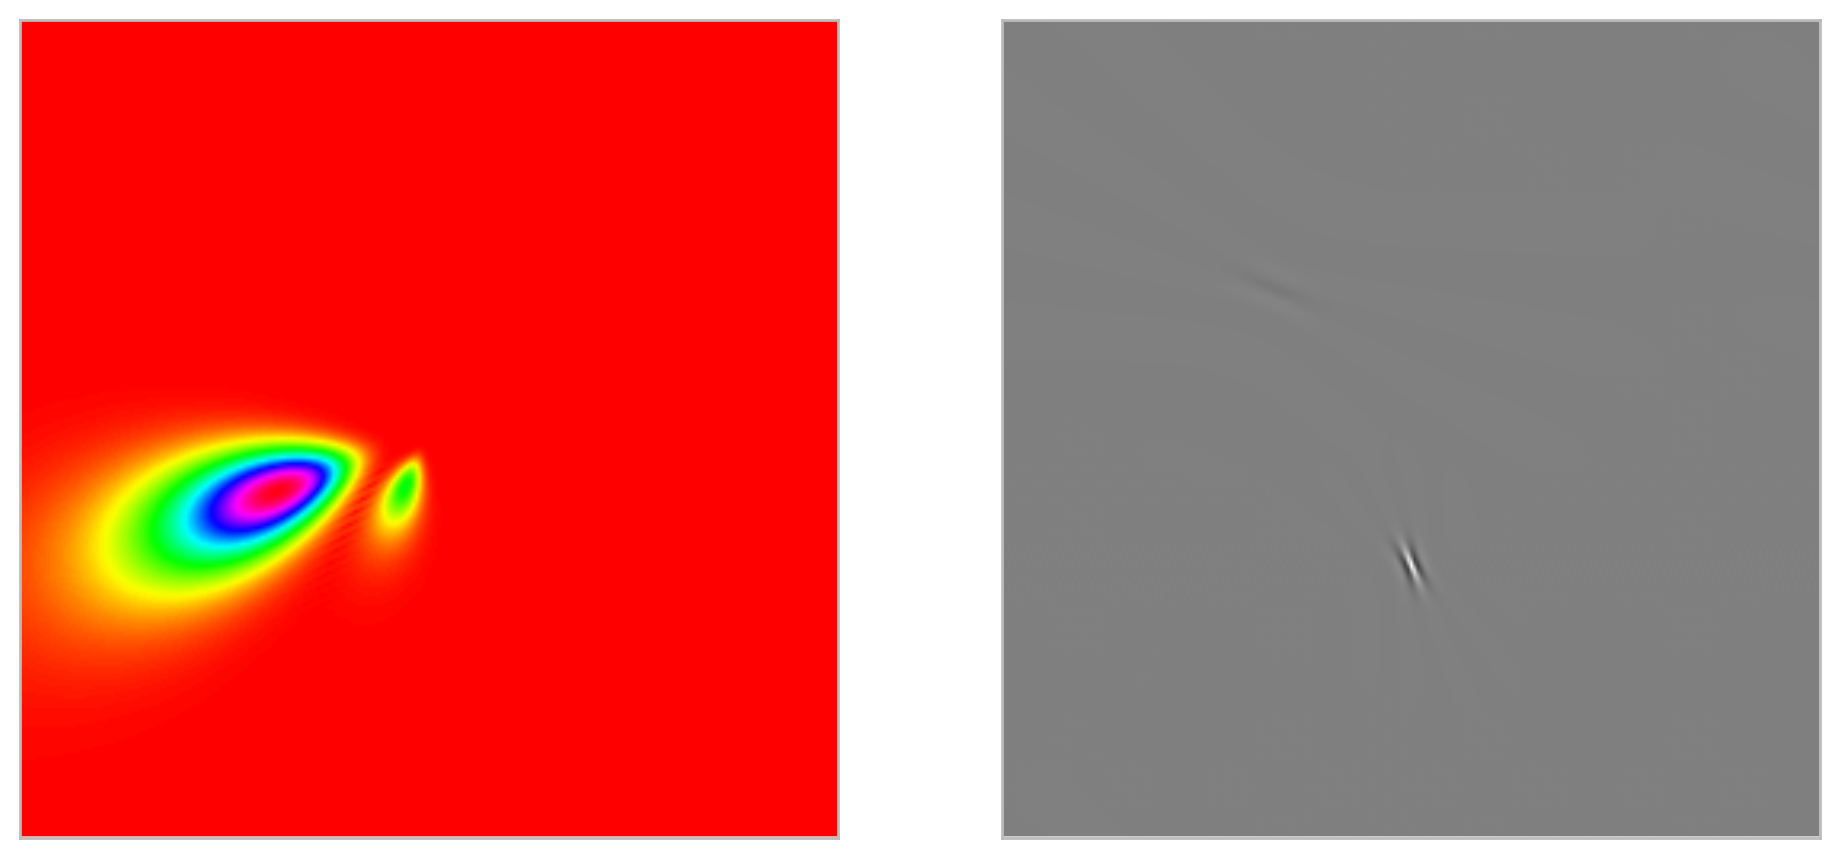

In [9]:
# filters in Fourier space
FT_lg_in = lg.loggabor(edge_in[0], edge_in[1], sf_0=mp.sf_0[edge_in[3]],
                         B_sf=mp.B_sf, theta= mp.theta[edge_in[2]], B_theta=mp.B_theta)
FT_lg_bis = lg.loggabor(edge_bis[0], edge_bis[1], sf_0=mp.sf_0[edge_bis[3]],
                         B_sf=mp.B_sf, theta= mp.theta[edge_bis[2]], B_theta=mp.B_theta)
# mixing both and shows one
FT_lg_ = 42. *  FT_lg_in - 4.*np.sqrt(2)*np.exp(1j*np.pi/4.) * FT_lg_bis
fig = im.show_FT(FT_lg_)

In [10]:
# computing activity
image = im.invert(FT_lg_)
C = mp.init(image)

1796.00376265 (171, 128, 2, 2) [170.66666666666666, 128.0, 2, 2] (41.0643887511+8.11123774607j)


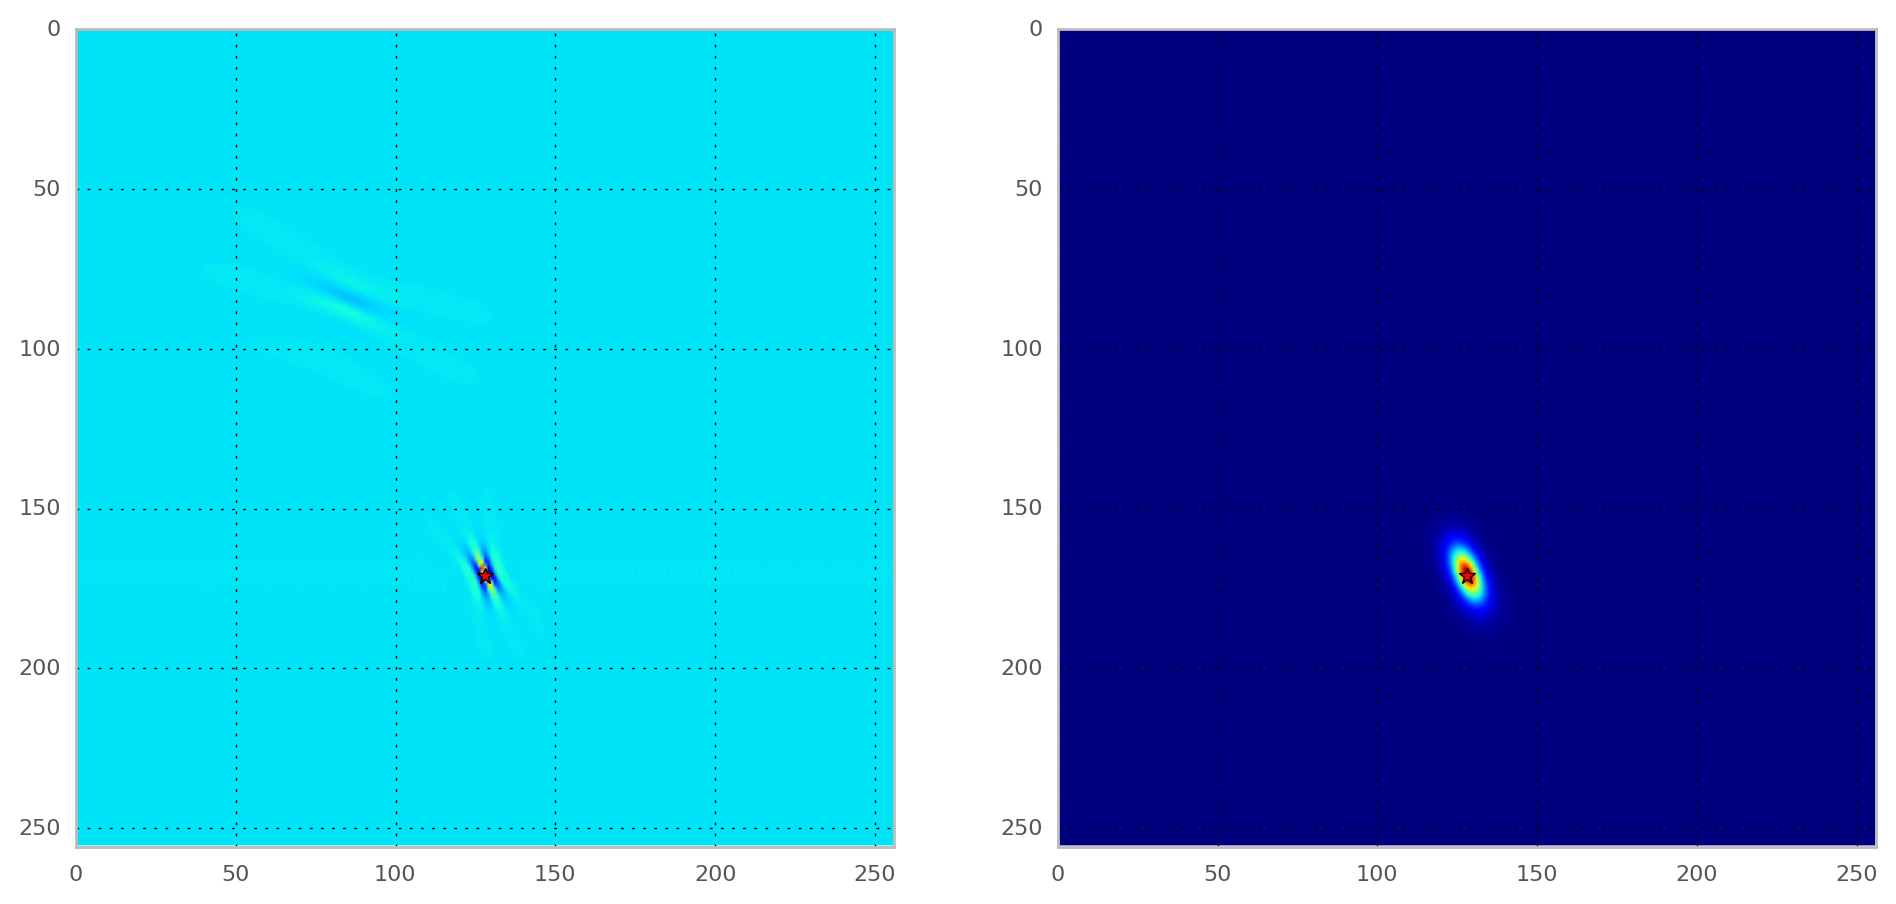

In [11]:
# getting best match
edge_star = mp.argmax(C)
print(np.sum(image**2), edge_star,  edge_in,  C[edge_star])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(im.normalize(image))
plt.plot([edge_star[1]], [edge_star[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))
plt.subplot(122)
plt.imshow(im.normalize(np.absolute(C[:,:,edge_star[2],edge_star[3]])))
plt.plot([edge_star[1]], [edge_star[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))

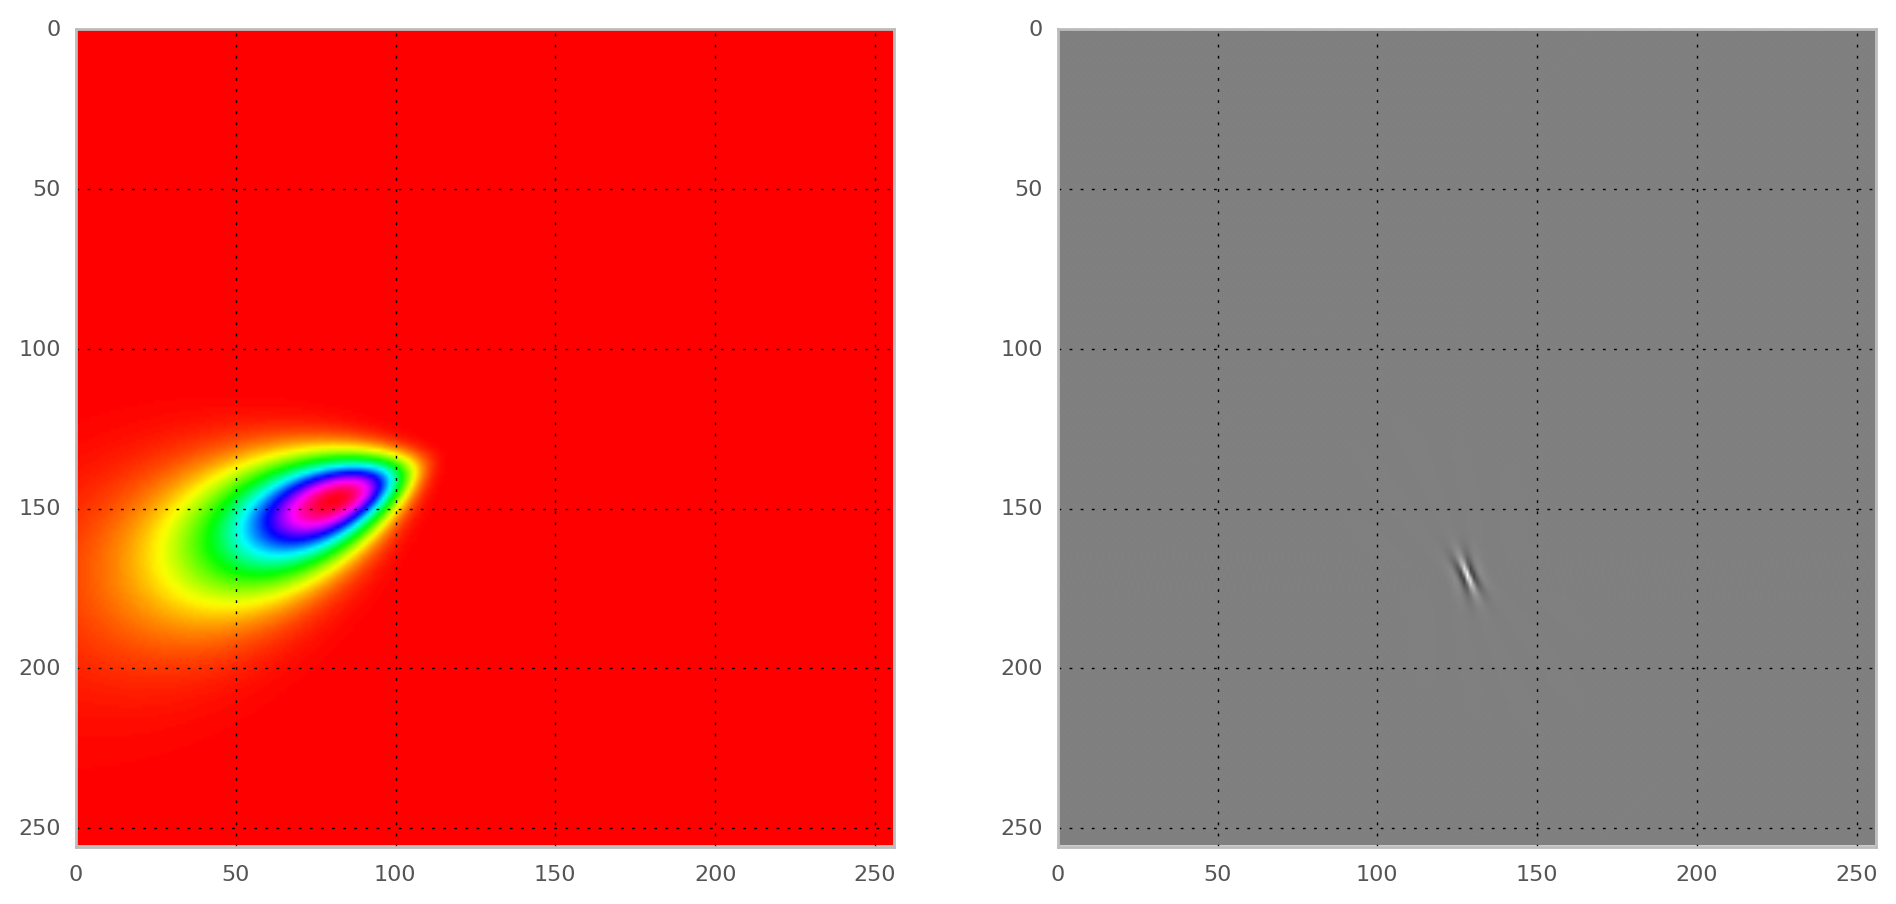

In [12]:
#! showing the winner
#pylab.imshow(im.normalize(lg_star), **opts)
FT_star = lg.loggabor(edge_star[0], edge_star[1], sf_0=mp.sf_0[edge_star[3]],
                         B_sf=mp.B_sf, theta= mp.theta[edge_star[2]], B_theta=mp.B_theta)
im_star = im.invert(FT_star)
fig = im.show_FT(FT_star, axis=True)

In [13]:
#! normalization should give 1 for resp. sum image energy, half mean spectrum energy, max coco:
print(np.sum(im_star**2), np.mean(np.abs(FT_star)**2)/2, im.FTfilter(im_star, FT_star).max())

1.00000213301 1.0 1.00000213301


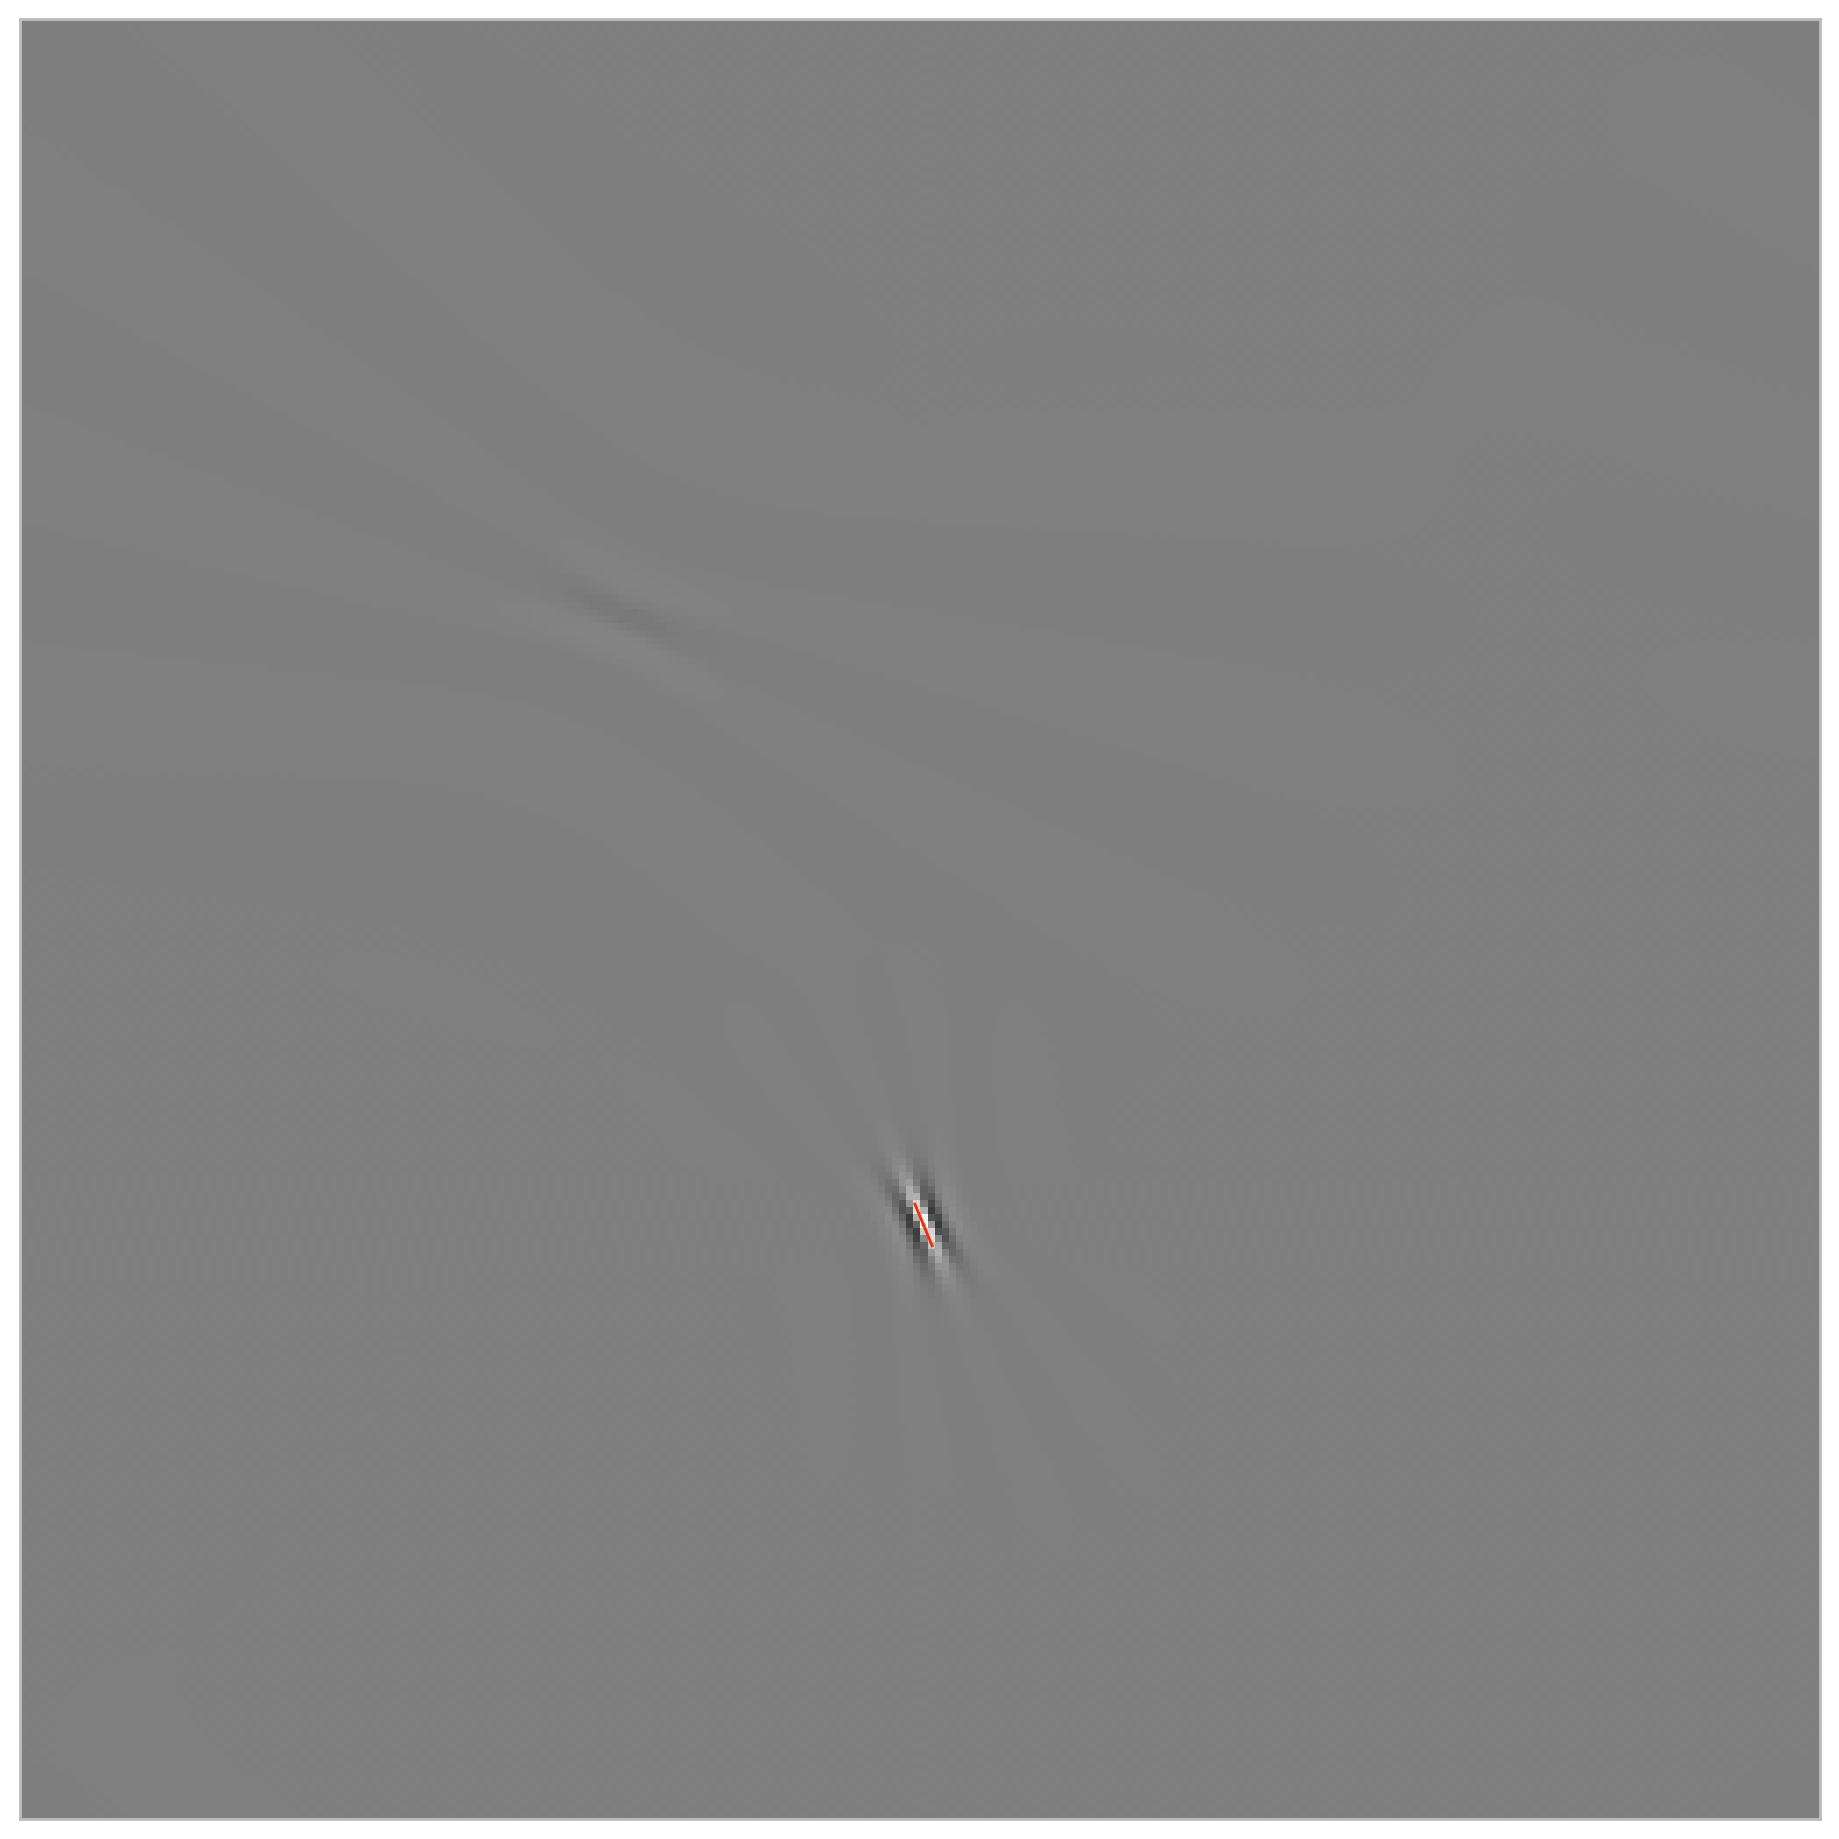

In [14]:
edge_star_in = np.array([edge_star[0], edge_star[1], mp.theta[edge_in[2]], mp.sf_0[edge_star[3]], np.absolute(C[edge_star]), np.angle(C[edge_star])])
mp.pe.figsize_edges = 9
fig, a = mp.show_edges(edge_star_in[:, np.newaxis], image=image)

In [15]:
#! we substract the residual from the image
image_res = (image - C[edge_star] * im_star).real # C_star*lg_star
print(C[edge_star], image[edge_star[0], edge_star[1]], im_star[edge_star[0], edge_star[1]]*C[edge_star].real, image_res[edge_star[0], edge_star[1]],)

(41.0643887511+8.11123774607j) 13.1776875887 13.3391945111 -0.161506922435


In [16]:
C_res = mp.init(image_res)
edge_bis = mp.argmax(C_res)
print(np.sum(image_res**2), edge_star, edge_bis, C_res[edge_star], C_res[edge_bis])

109.723336005 (171, 128, 2, 2) (171, 128, 3, 2) (-8.75906249397e-05+8.11123774607j) (-0.246767822125+8.13608503562j)


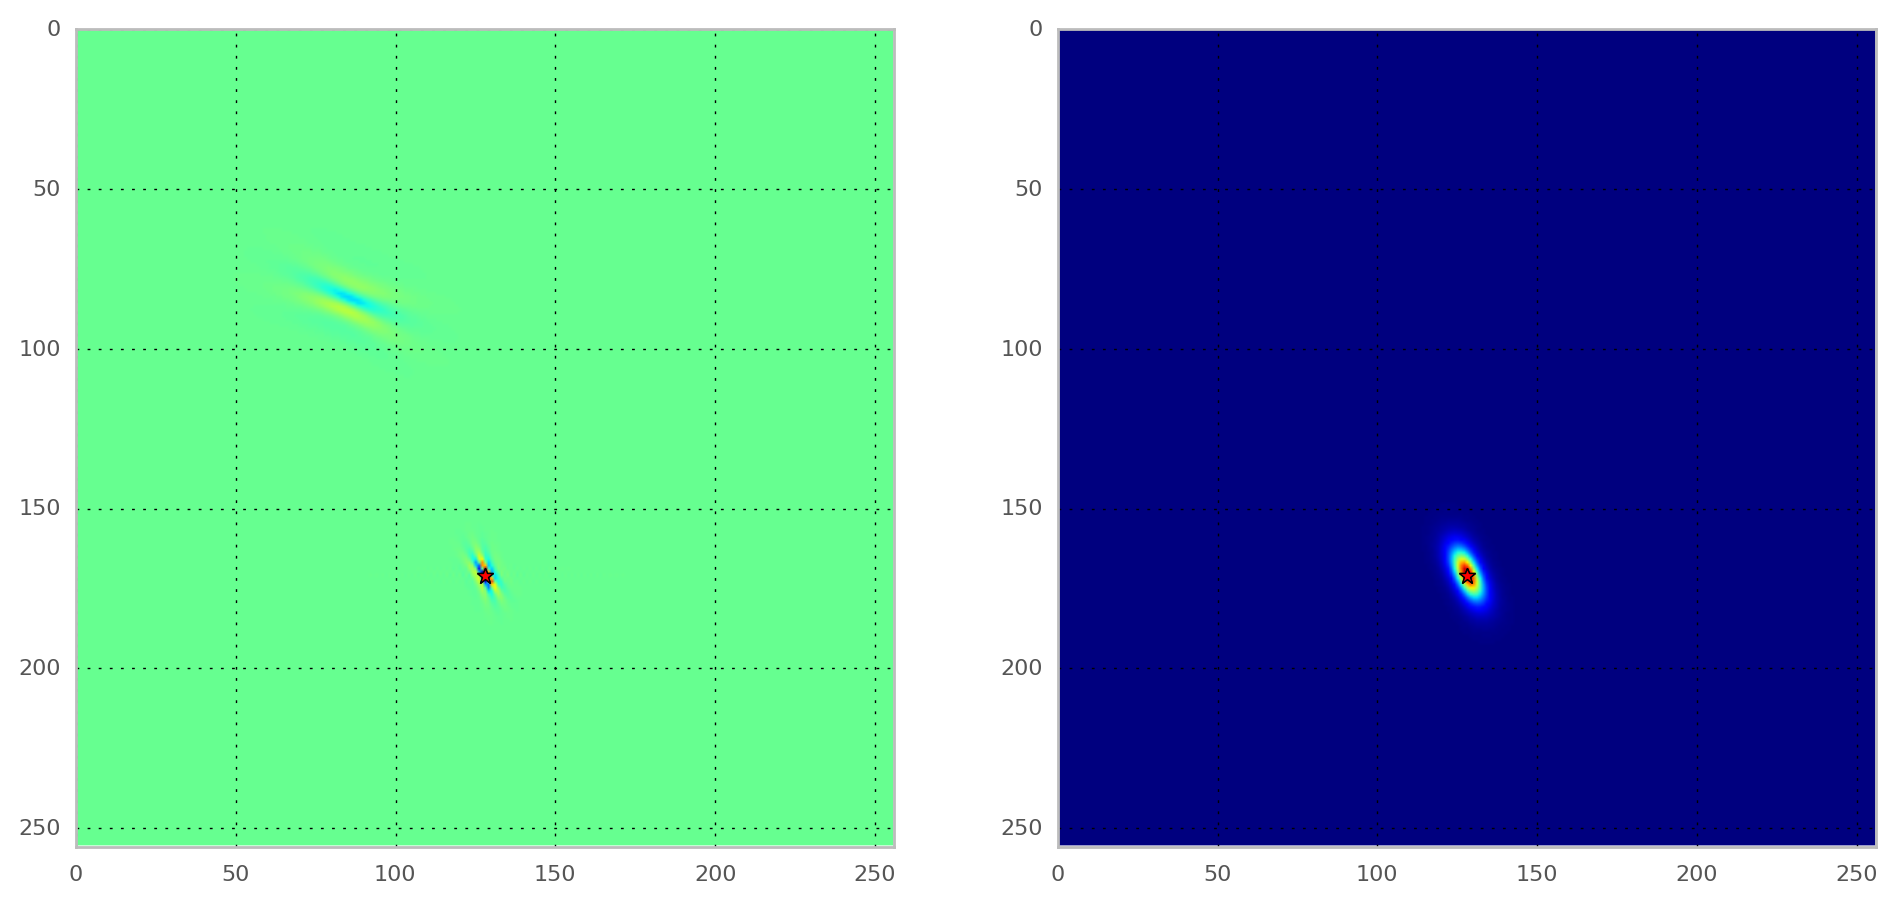

In [17]:
#! plotting the residual image and activity :
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(im.normalize(image_res))
plt.plot([edge_star[1]], [edge_star[0]], 'b*')
plt.plot([edge_bis[1]], [edge_bis[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))
plt.subplot(122)
plt.imshow(im.normalize(np.absolute(C_res[:,:,edge_star[2],edge_star[3]])))
plt.plot([edge_star[1]], [edge_star[0]], 'b*')
plt.plot([edge_bis[1]], [edge_bis[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))

In [18]:
#! or directly the activity
C_res = mp.backprop(C, edge_star)
edge_bis = mp.argmax(C_res)
print(np.sum(image_res**2), edge_star, C_res[edge_star], C_res[edge_bis])

109.723336005 (171, 128, 2, 2) (-8.75906249362e-05+1.73013261886e-05j) (-4.39477914338-3.55270063491j)


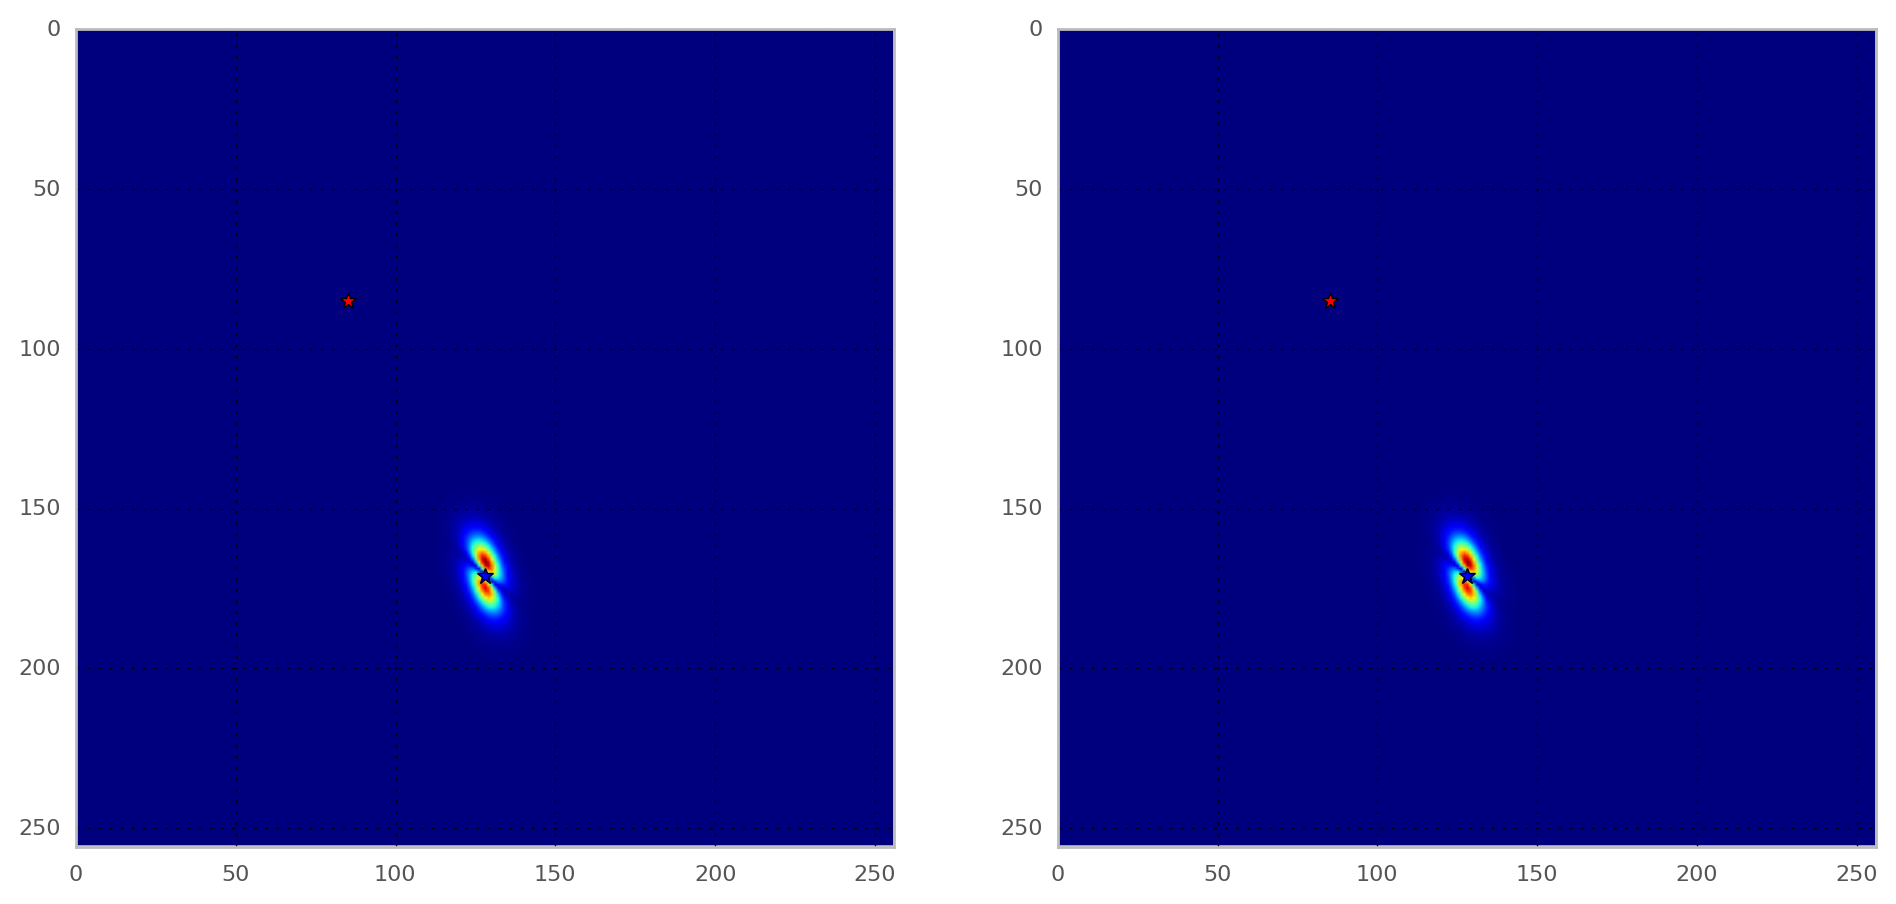

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(im.normalize(np.absolute(C[:,:,edge_star[2],edge_star[3]])))
plt.plot([edge_star[1]], [edge_star[0]], 'b*')
plt.plot([edge_bis[1]], [edge_bis[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))
plt.subplot(122)
plt.imshow(im.normalize(np.absolute(C_res[:,:,edge_star[2],edge_star[3]])))
plt.plot([edge_star[1]], [edge_star[0]], 'b*')
plt.plot([edge_bis[1]], [edge_bis[0]], 'r*')
v = plt.axis((0, im.N_X, im.N_Y, 0))

[[  1.7100e+02   1.2800e+02  -1.1781e+00   2.3608e-01   4.1858e+01
    1.9501e-01]
 [  8.5000e+01   8.5000e+01  -3.9270e-01   9.0179e-02   5.6512e+00
   -2.4618e+00]]


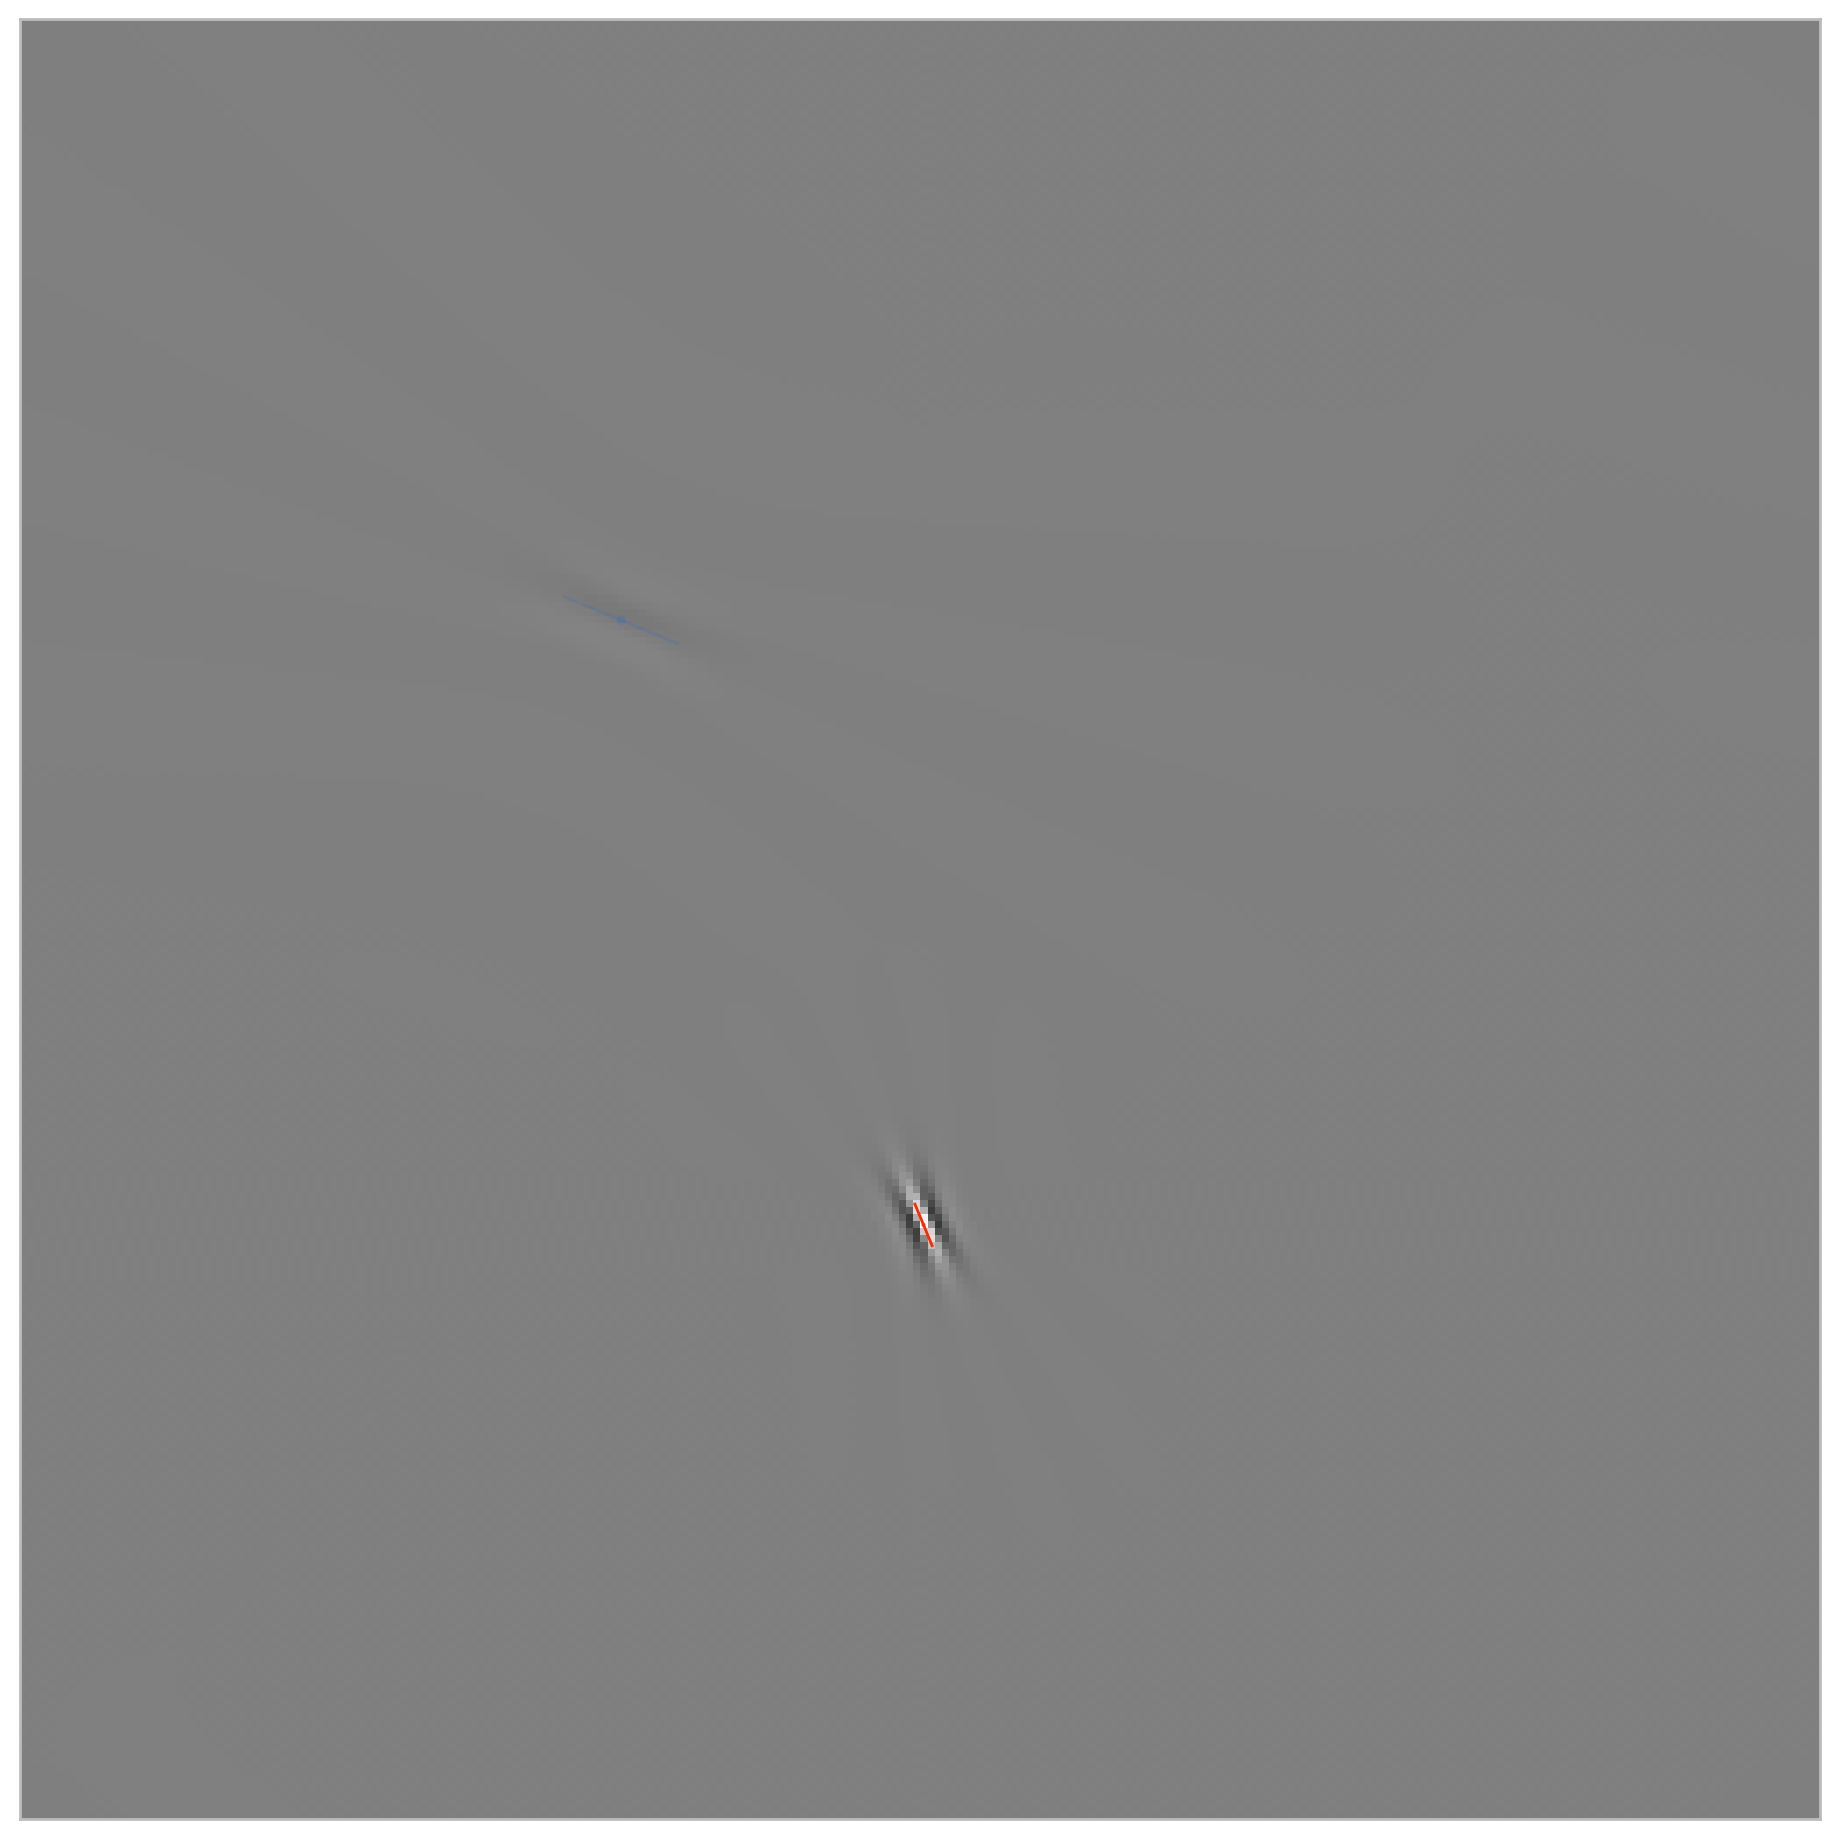

In [20]:
edge_star_bis = np.array([edge_bis[0], edge_bis[1], mp.theta[edge_bis[2]], mp.sf_0[edge_bis[3]], np.absolute(C[edge_bis]), np.angle(C[edge_bis])])

print(np.vstack((edge_star_in, edge_star_bis)))
fig, a = mp.show_edges(np.vstack((edge_star_in, edge_star_bis)).T, image=image)

[Back to top](#SparseEdges)

### testing three steps

In [21]:
# filters in Fourier space
FT_lg_in = lg.loggabor(edge_in[0], edge_in[1], 
                       theta= mp.theta[edge_in[2]], B_theta=mp.B_theta,
                       sf_0=mp.sf_0[edge_in[3]],  B_sf=mp.B_sf)
FT_lg_bis = lg.loggabor(edge_bis[0], edge_bis[1], 
                        theta= mp.theta[edge_bis[2]], B_theta=mp.B_theta,
                        sf_0=mp.sf_0[edge_bis[3]], B_sf=mp.B_sf)
# mixing both and shows one
FT_lg_ = 42. *  FT_lg_in + 16.*np.exp(1j*np.pi/4.) * FT_lg_bis

4 1.0


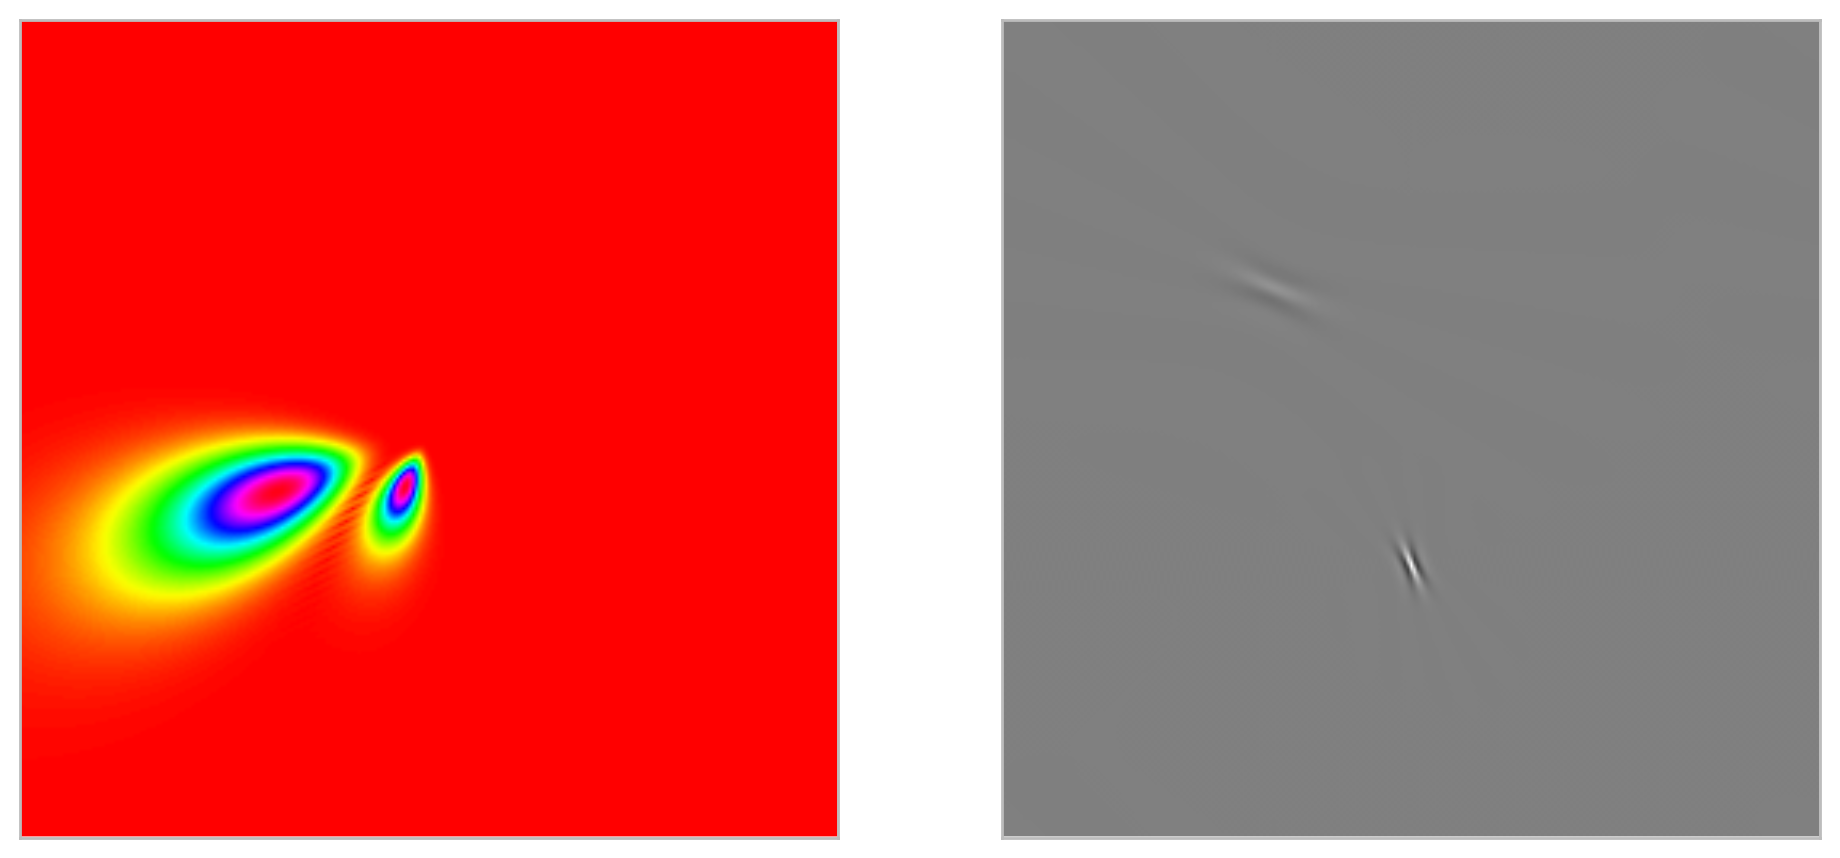

In [22]:
print(mp.N, mp.pe.MP_alpha)
fig = im.show_FT(FT_lg_)

In [23]:
image = im.invert(FT_lg_)
edges, C_res = mp.run_mp(image, verbose=True)

[ 25 %] elapsed[sec]: 0.984 | ETA[sec]: 2.953 

Edge 0 / 4  - Max activity  :  41.857809321  phase=  11.1735072859  deg,  @  (171, 128, 2, 2)
Edge

[ 50 %] elapsed[sec]: 5.625 | ETA[sec]: 5.625 

 1 / 4  - Max activity  :  16.0000000005  phase=  45.0000000021  deg,  @  (85, 85, 8, 4)
Edge

[ 75 %] elapsed[sec]: 10.185 | ETA[sec]: 3.395 

 2 / 4  - Max activity  :  2.30849245409  phase=  105.287498869  deg,  @  (171, 128, 3, 1)
Edge

[100 %] elapsed[sec]: 14.813 | ETA[sec]: 0.000 

 3 / 4  - Max activity  :  2.1350009507  phase=  -110.949043754  deg,  @  (169, 128, 1, 2)



Total time elapsed: 14.813 sec


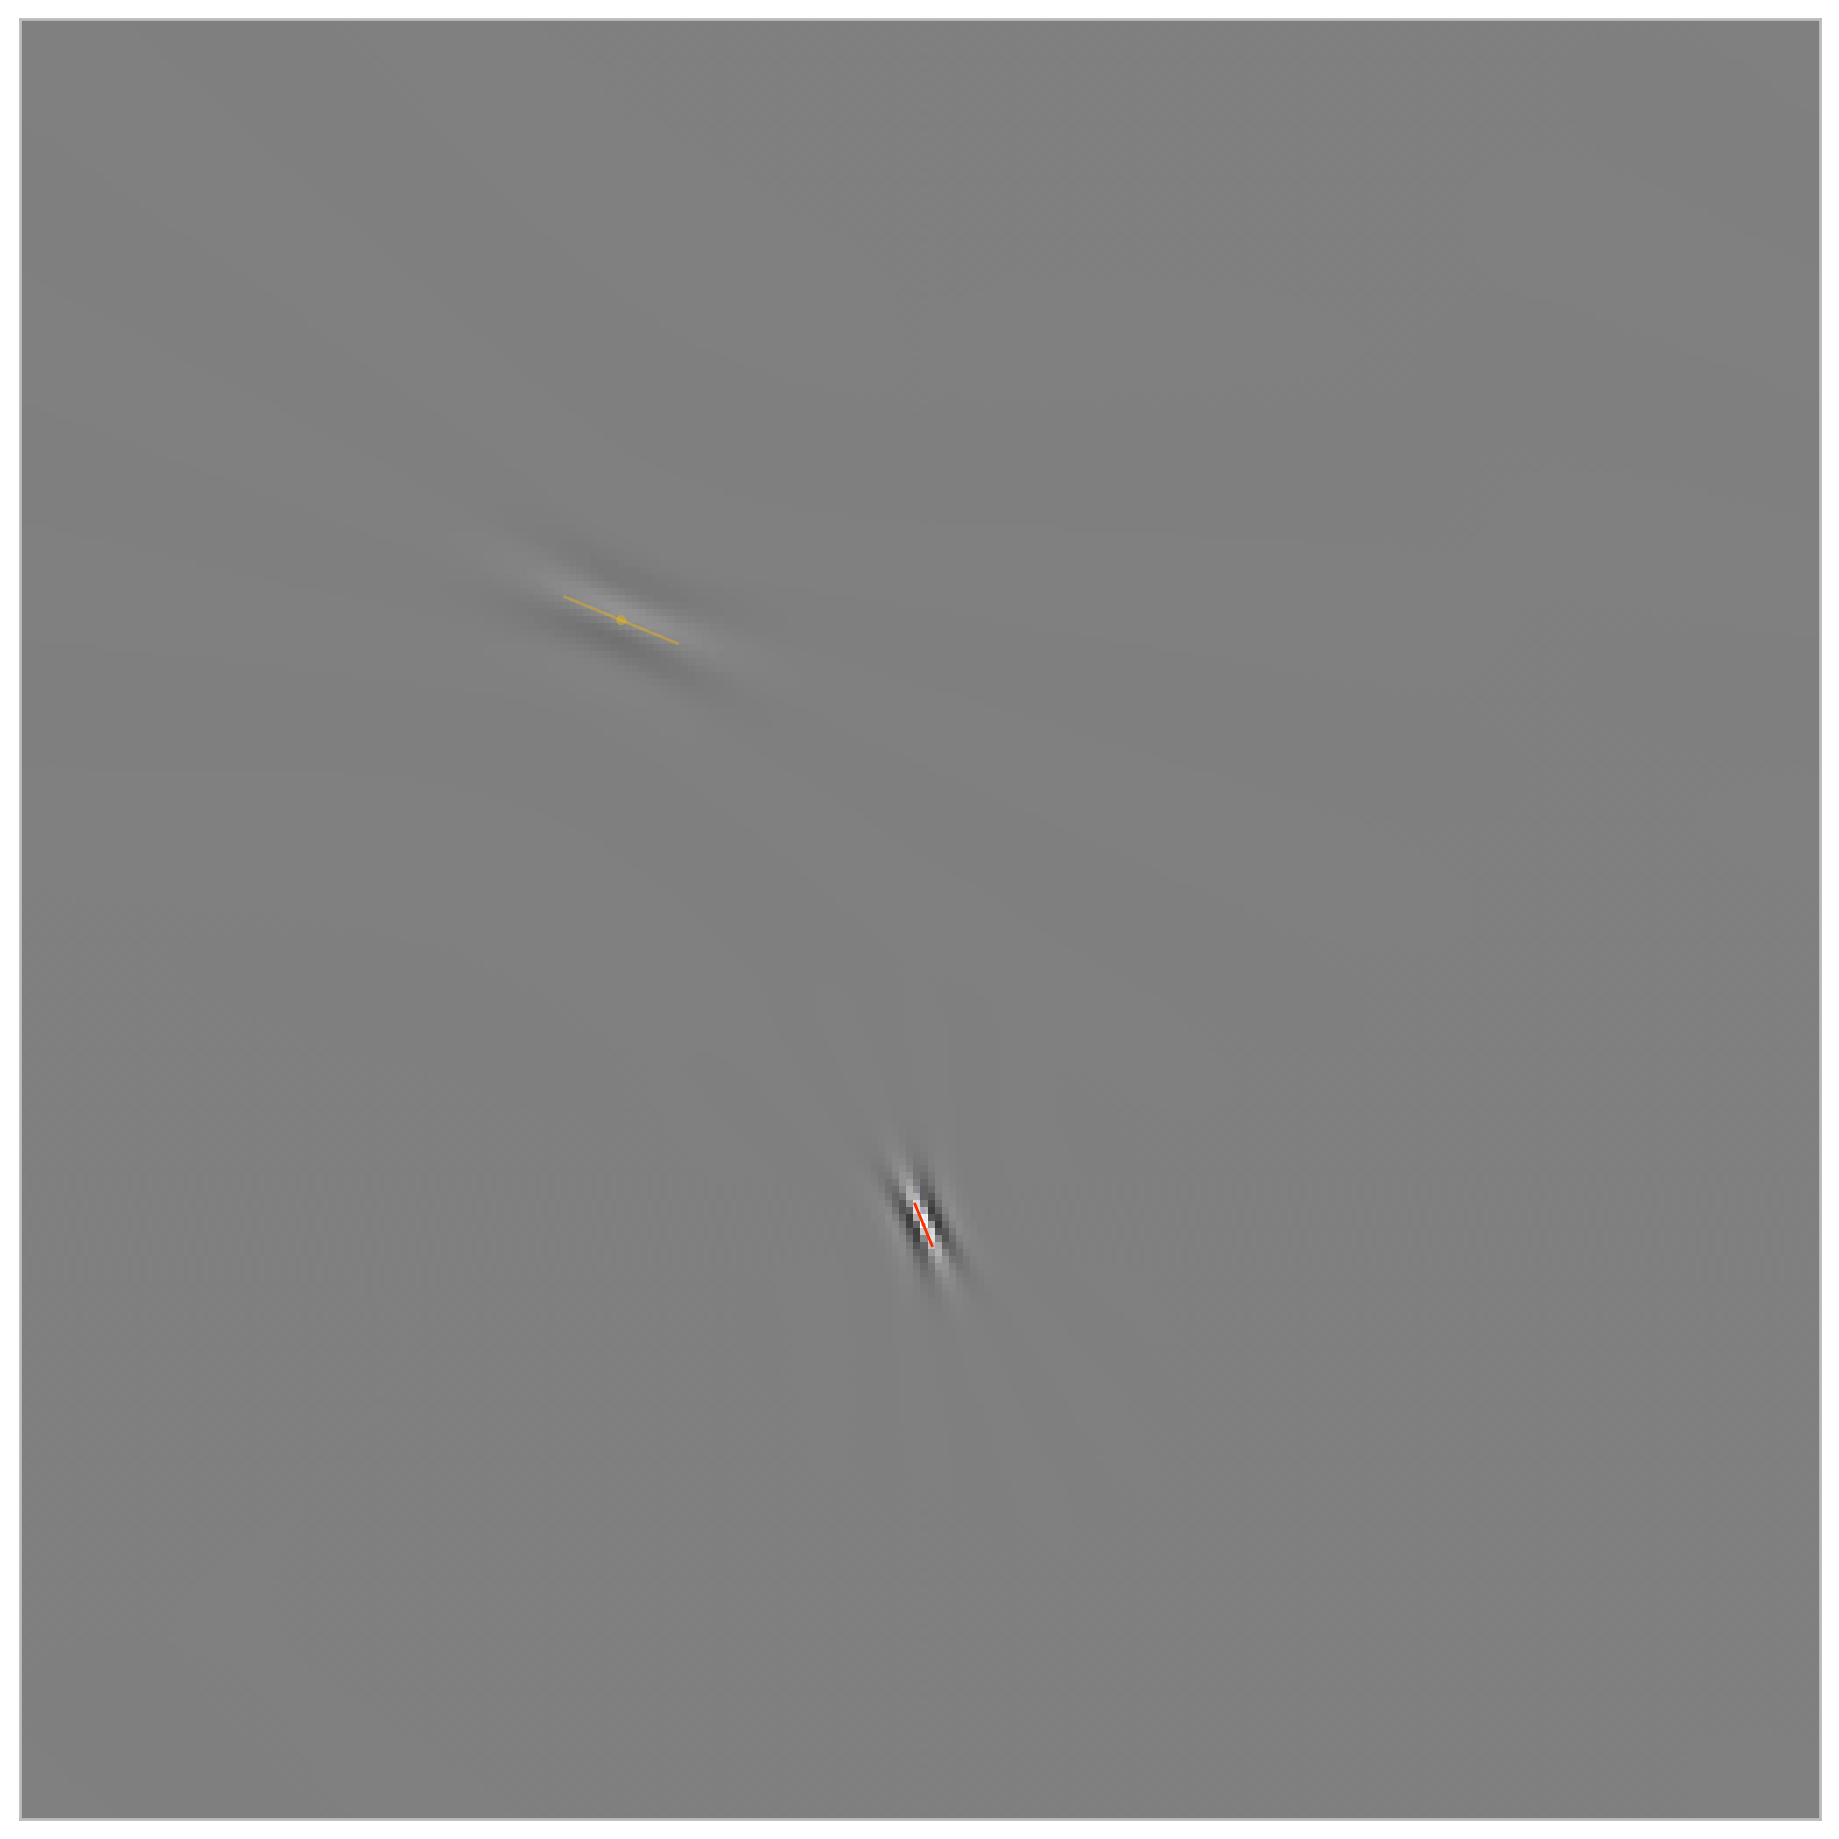

In [24]:
fig, a = mp.show_edges(edges, image=image)

Note: to store the complex value of the coefficient, we use the fact that it is easy to transform a complex number to 2 reals and back:

In [25]:
z = np.sqrt(2)*np.exp(1j*np.pi/4.)
z_, z_p = np.absolute(z), np.angle(z)
print(z, z_*np.exp(1j*z_p))

(1+1j) (1+1j)


[Back to top](#SparseEdges)

### Testing edge detection on a natural image

In [26]:
%%writefile test/experiment_example.py

import numpy as np
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges
im = Image('default_param.py')

# defining input image as Lena
from pylab import imread
image = imread('database/yelmo' + str(im.N_X) + '.png').mean(axis=-1)
image = imread('database/lena' + str(im.N_X) + '.png').mean(axis=-1)
#print image.mean(), image.std()
#print pe.N_X

im.pe.N = 512
image = im.normalize(image, center=True)
#print image.mean(), image.std()
lg = LogGabor(im)
mp = SparseEdges(lg)

matname = 'mat/example.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

matname_RMSE = 'mat/example_RMSE.npy'
try:
    RMSE = np.load(matname_RMSE)
except:
    RMSE = np.ones(mp.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.do_whitening: image_ = mp.im.whitening(image_)
    for i_N in range(mp.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*im.mask-image_rec*im.mask)**2).sum()

    np.save(matname_RMSE, RMSE)        

Overwriting test/experiment_example.py


In [27]:
#!rm mat/example.npy mat/example_RMSE.npy
!ls -l  mat/example.npy mat/example_RMSE.npy

-rw-r--r-- 1 lolo staff 24656 Jan 13 17:57 mat/example.npy
-rw-r--r-- 1 lolo staff  4176 Jan 13 17:57 mat/example_RMSE.npy


In [28]:
%run test/experiment_example.py

(512,) (6, 512)


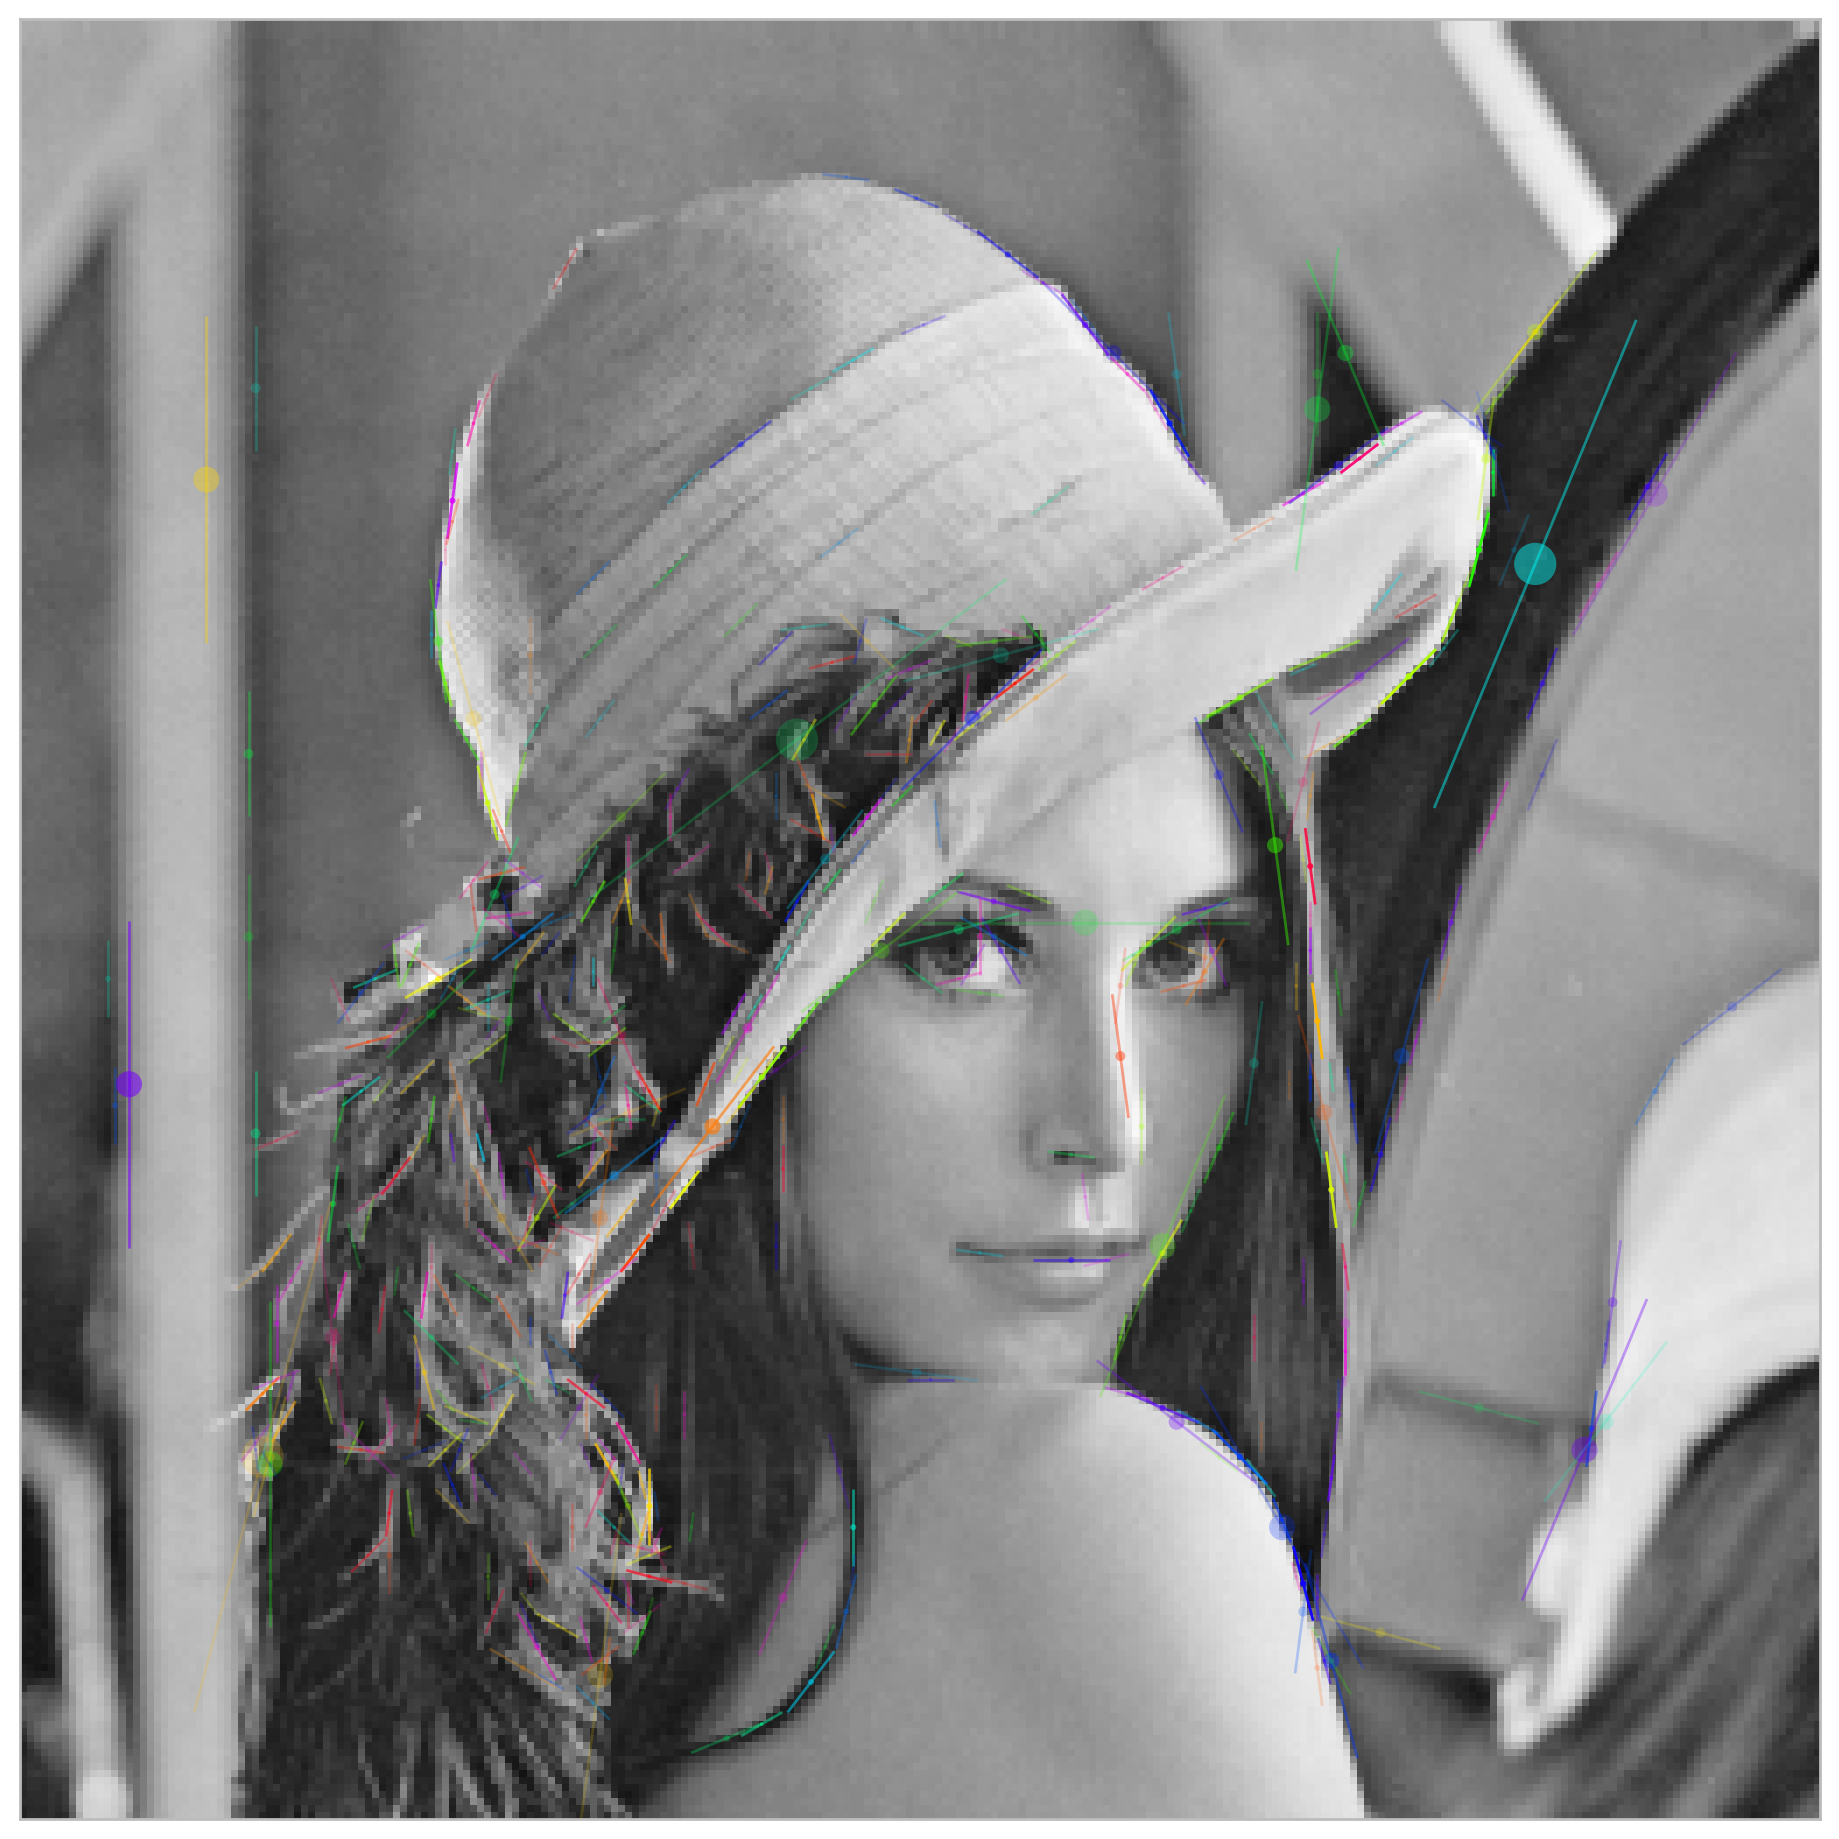

In [29]:
edges = np.load(matname)

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = 9 #.382 * fig_width
#mp.pe.line_width = 1.
#mp.pe.scale = 1.
fig, a = mp.show_edges(edges, image=image, show_phase=True)#, pedestal=.0, gamma=1.) #, color='toto'

FORMATS = ['pdf', 'eps']
if not(srcpath==''): 
    for ext in FORMATS: fig.savefig(srcpath + '/figures/SparseLets_A_rec.' + ext)
    for ext in FORMATS: fig.savefig(srcpath + '/figures/SparseLets_A.' + ext)

print(RMSE.shape, edges.shape)

In [30]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.im.whitening(image)-image_rec)**2).sum()/((mp.im.whitening(image))**2).sum())

RMSE-W =  0.375351491534


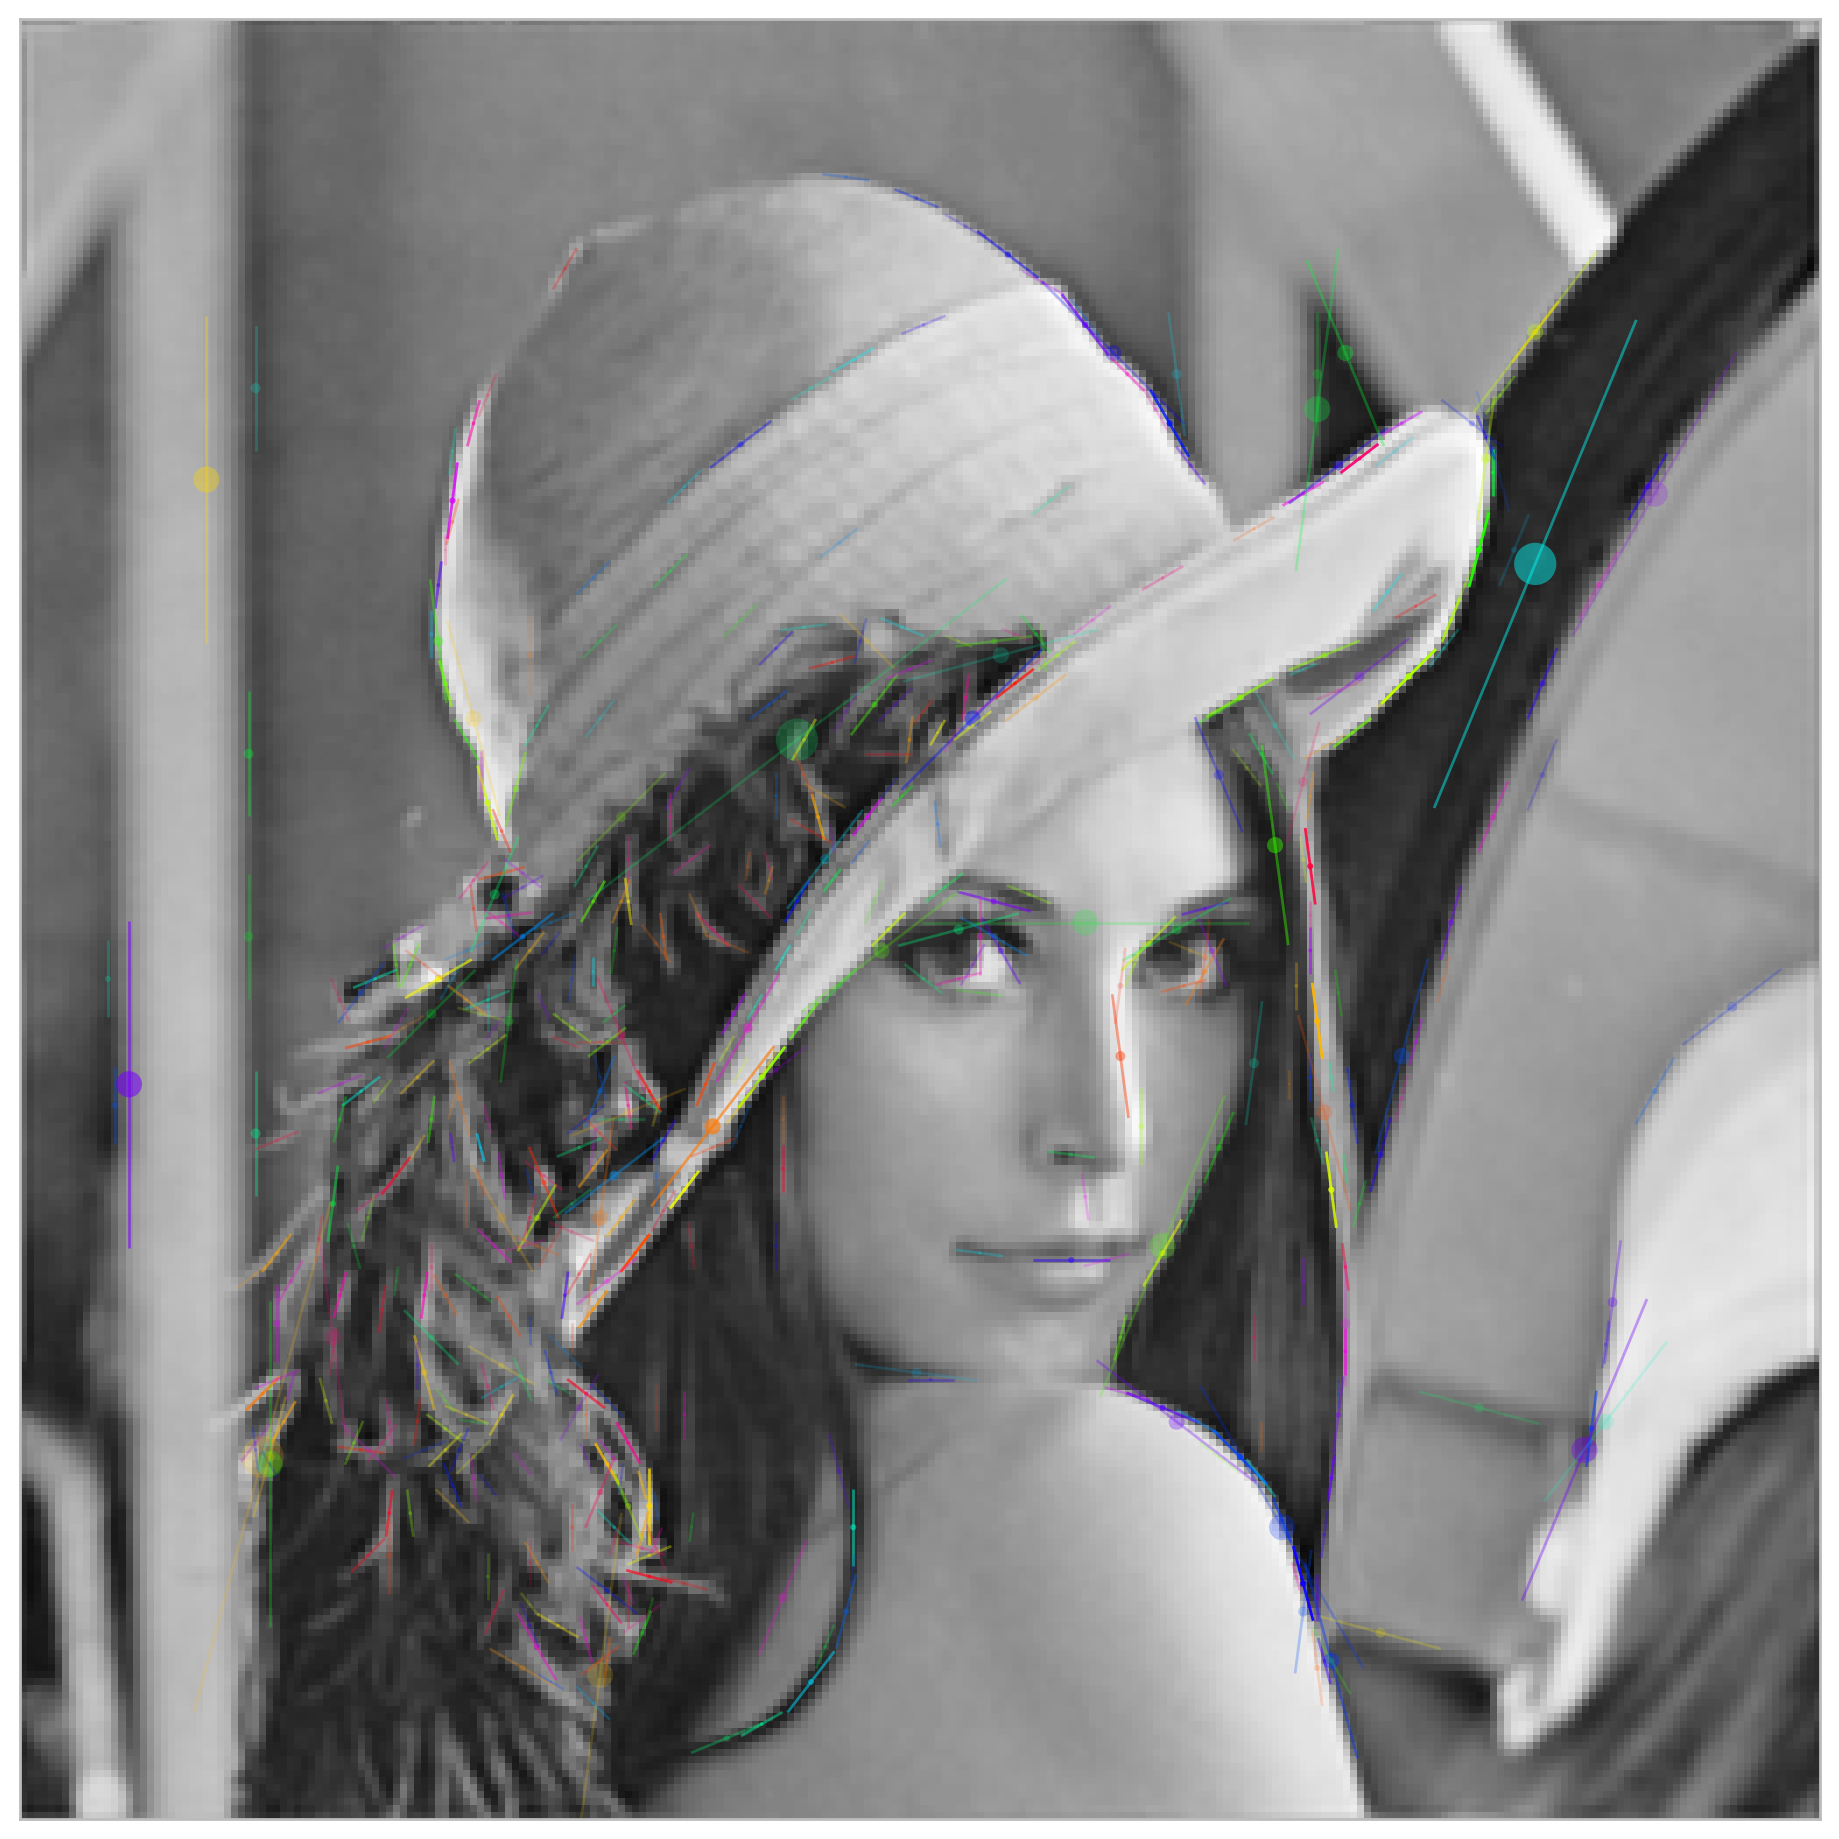

In [31]:
image = imread('database/lena' + str(im.N_X) + '.png').mean(axis=-1)
if mp.do_whitening: image = mp.im.whitening(image)
fig, a = mp.show_edges(edges, image=mp.im.dewhitening(image)*1.)

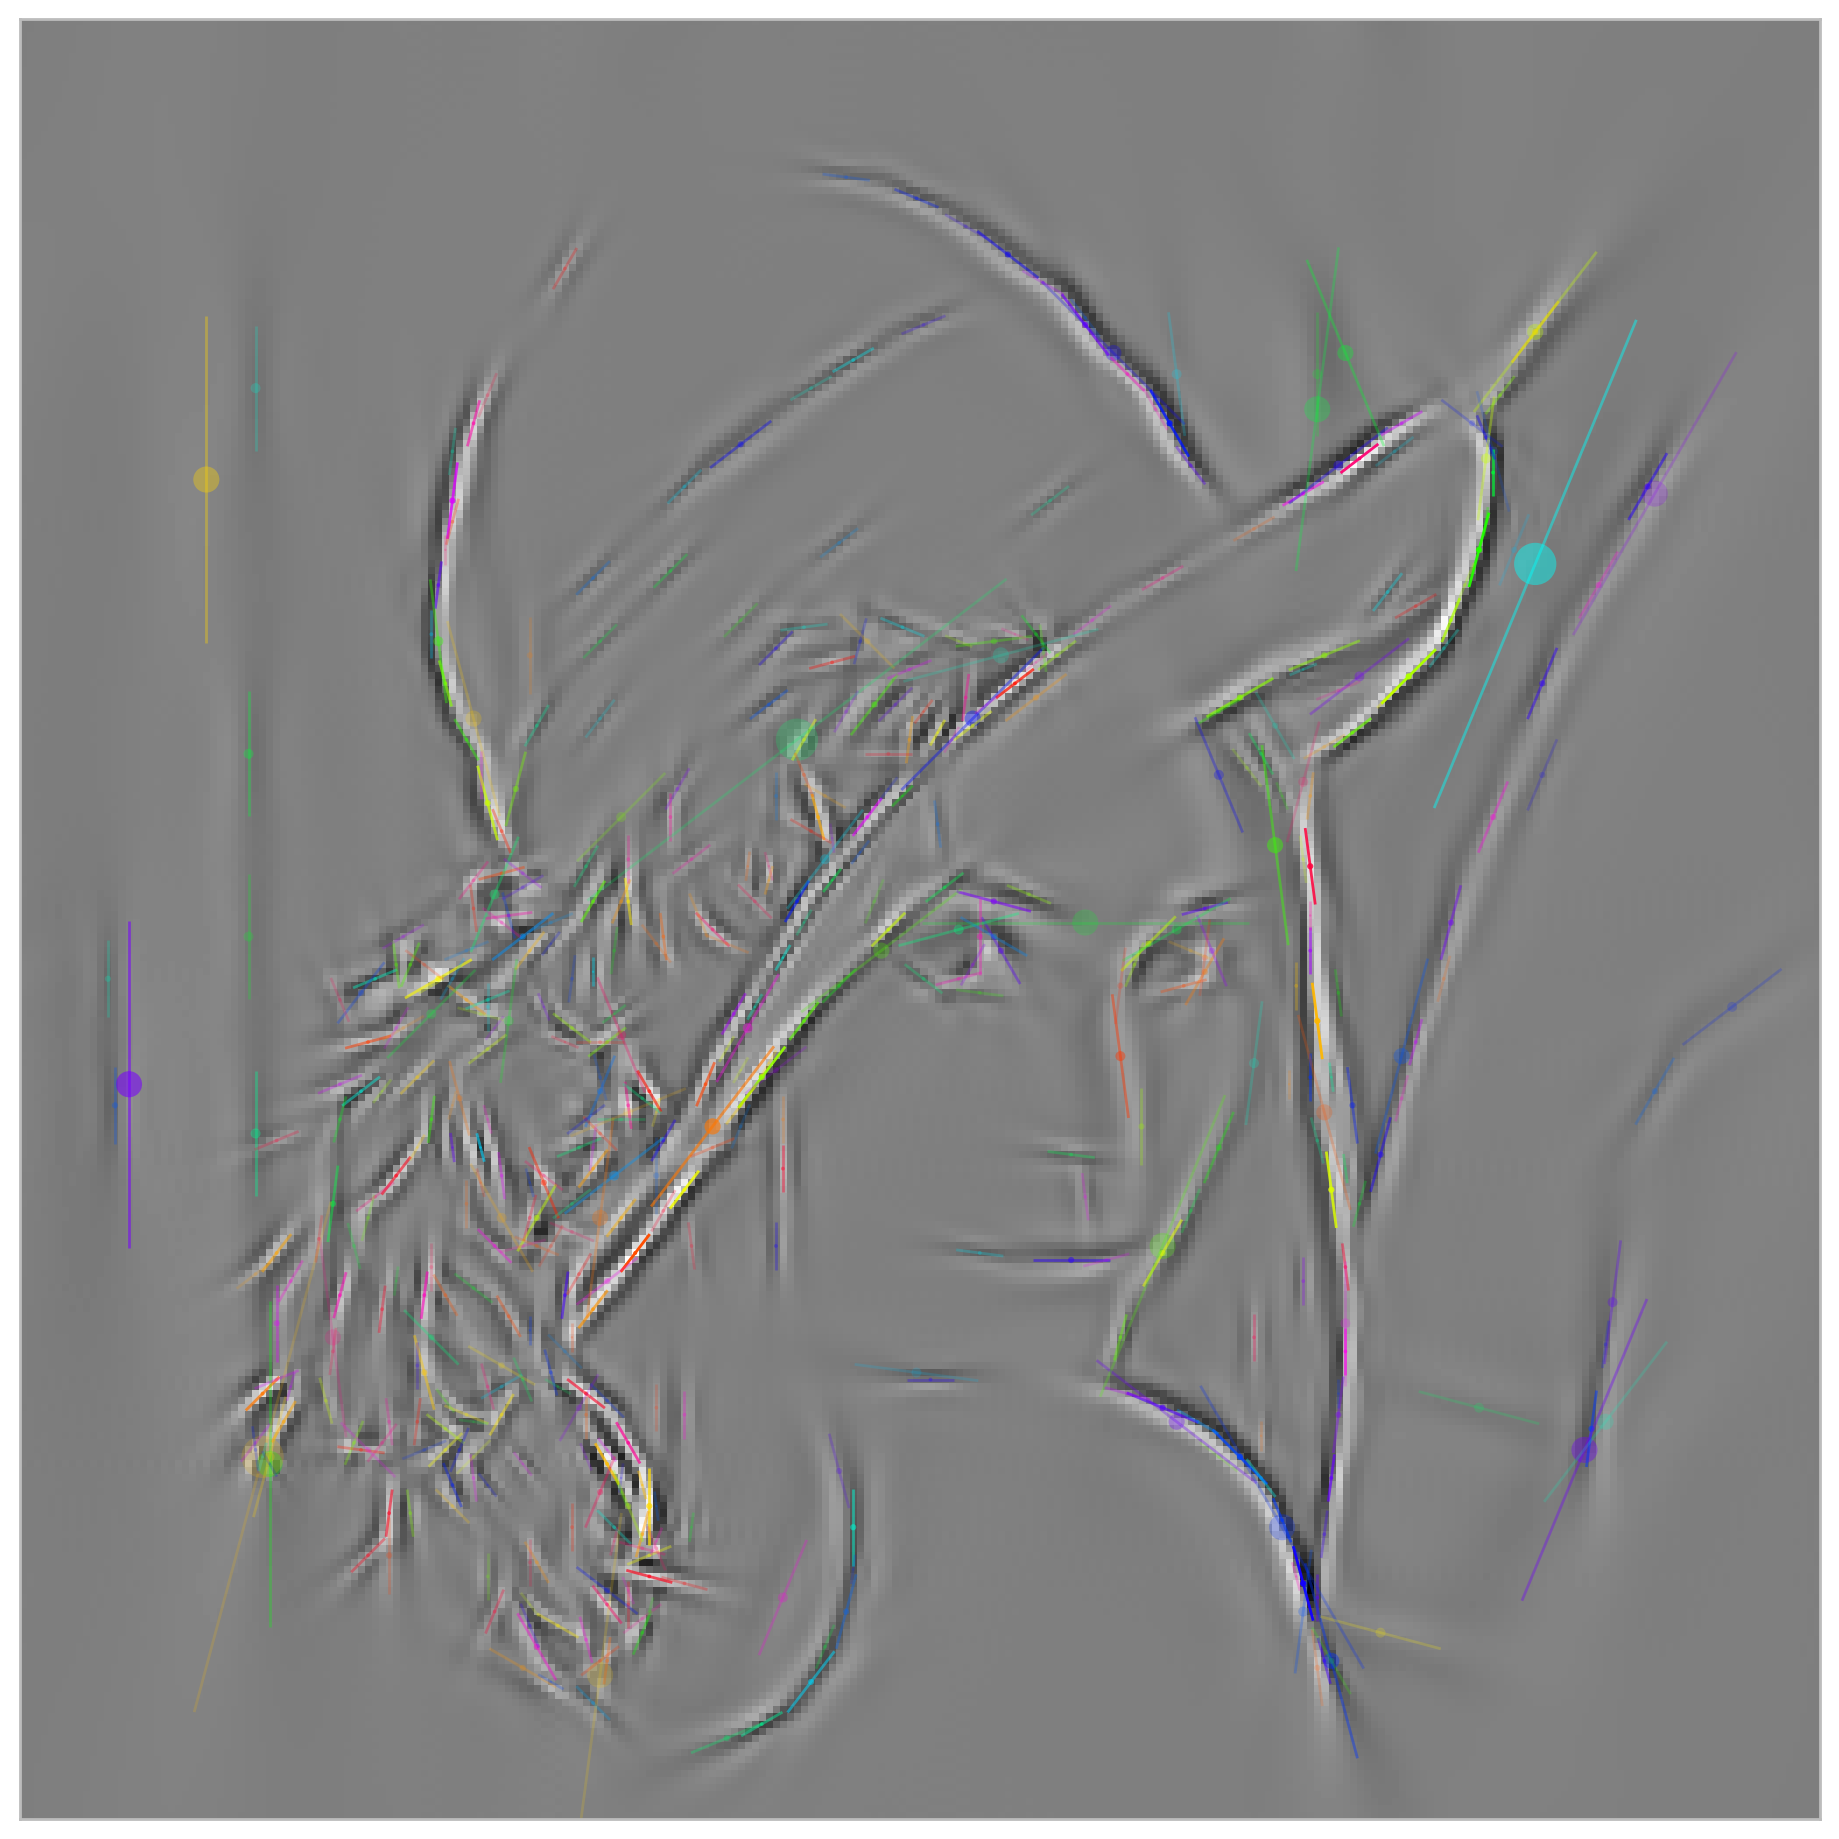

In [32]:
fig, a = mp.show_edges(edges, image=(image_rec)*1.)

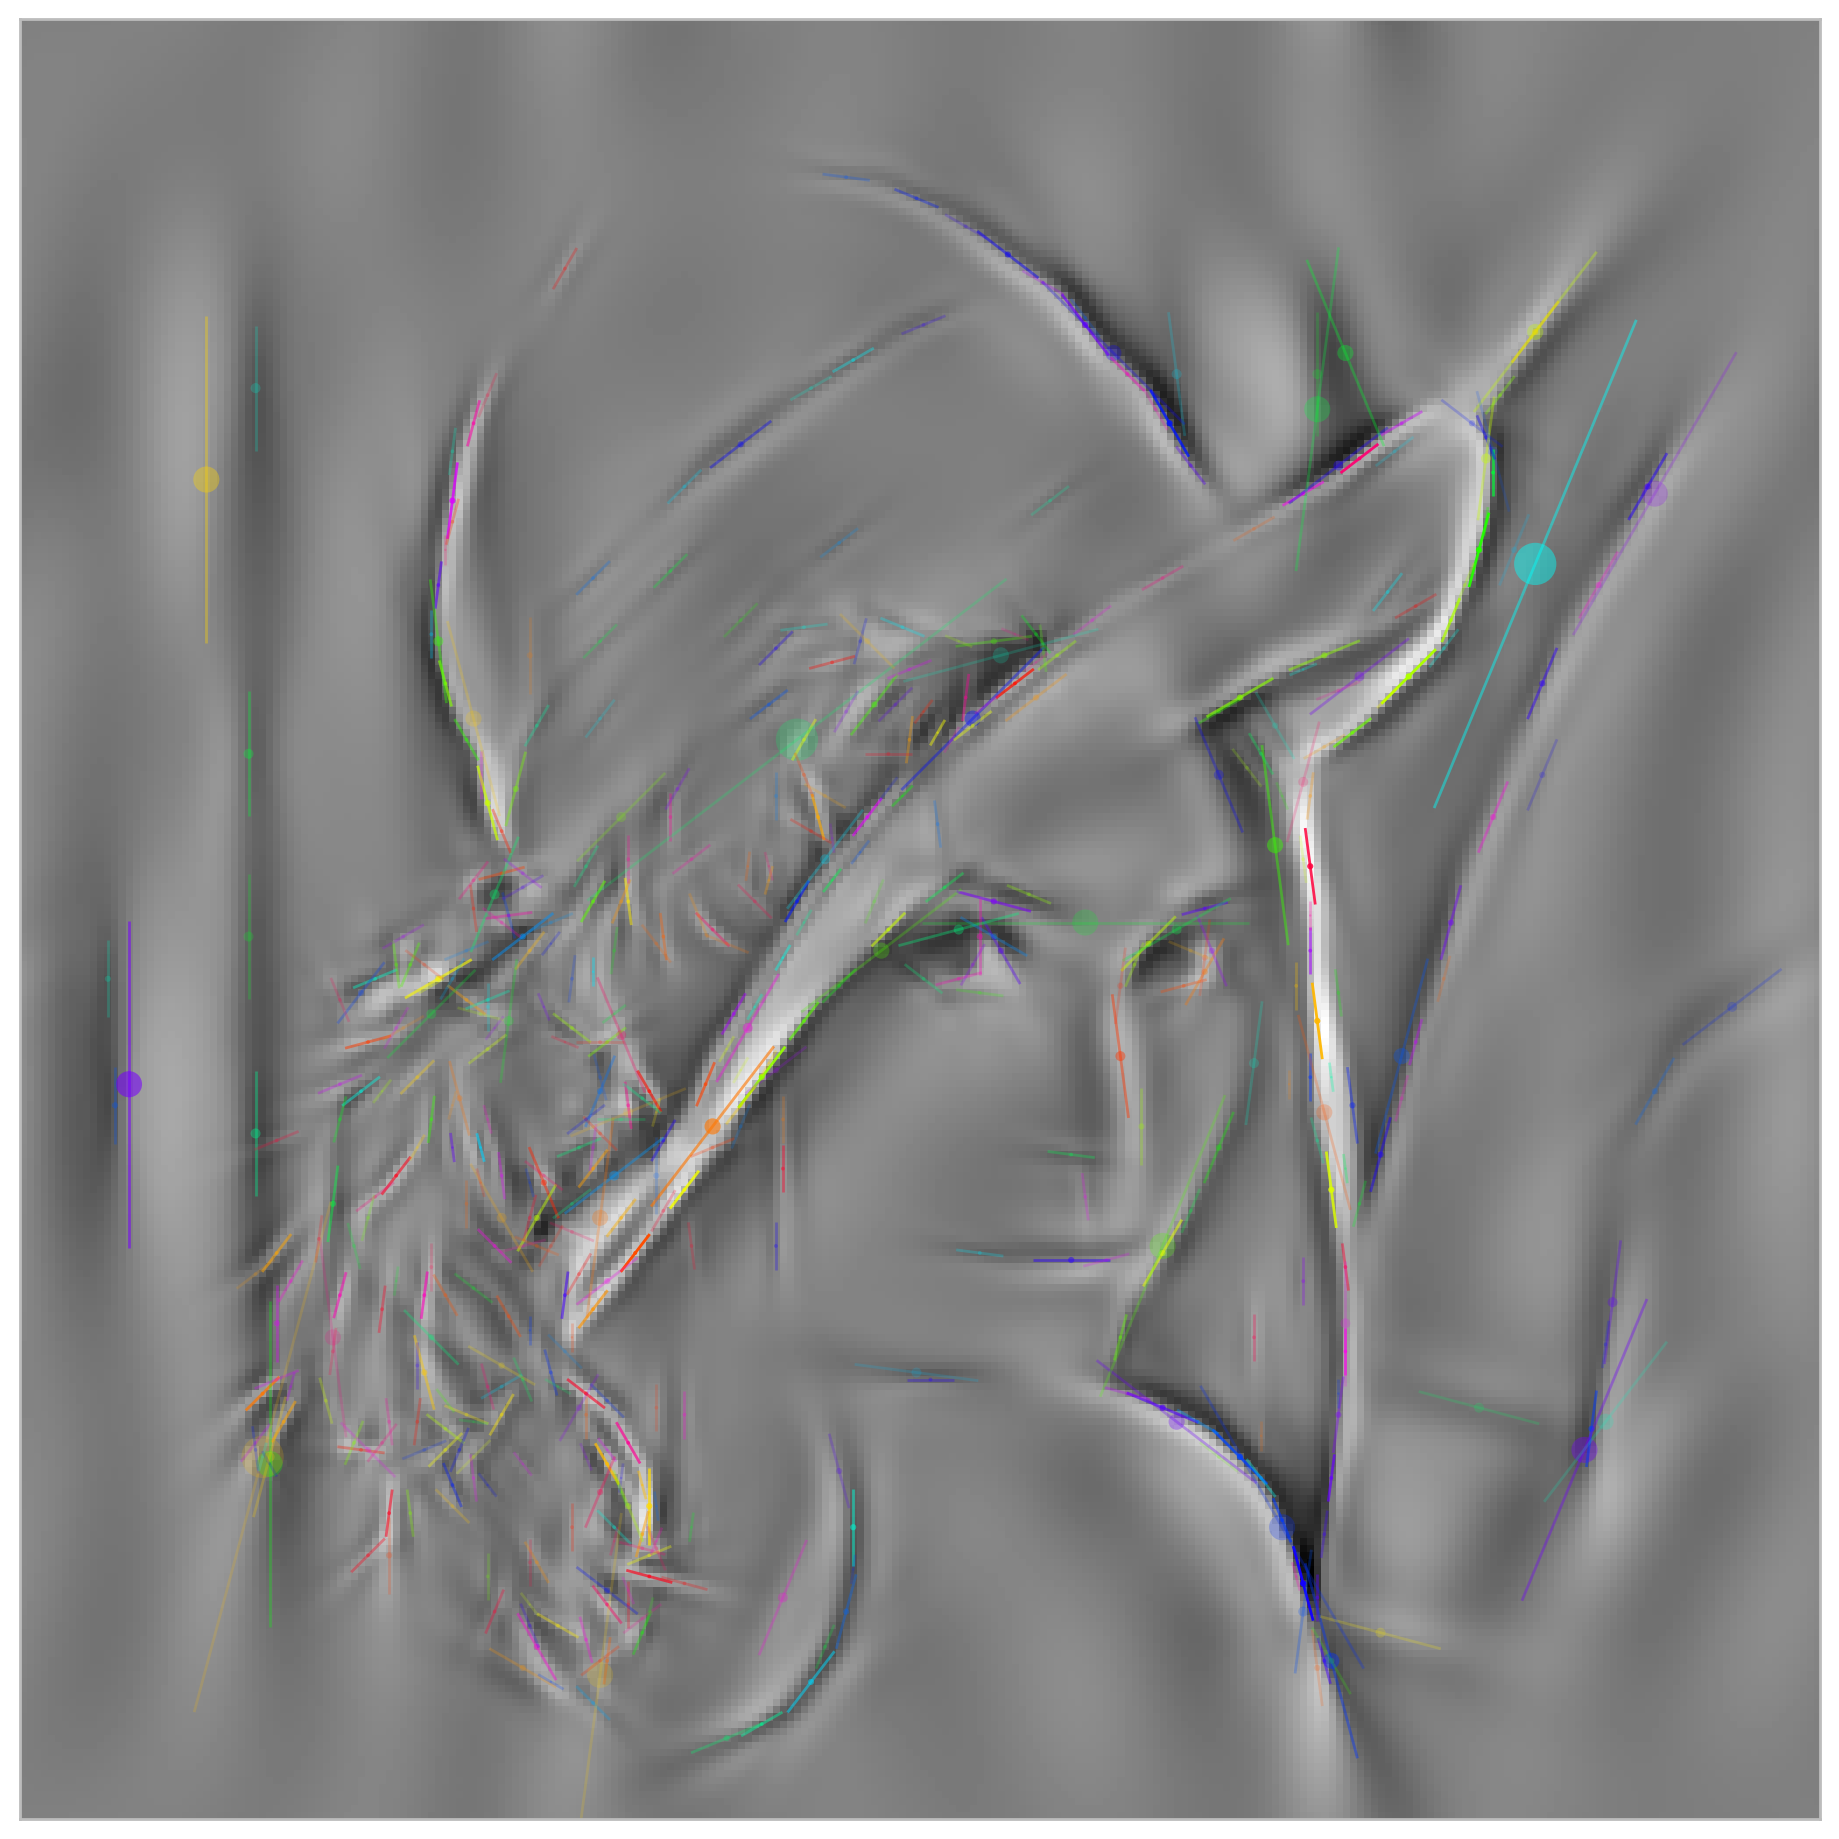

In [33]:
#fig, a = mp.show_edges(edges, image=image_rec*1.)
fig, a = mp.show_edges(edges, image=mp.im.dewhitening(image_rec*1., threshold=0.05))

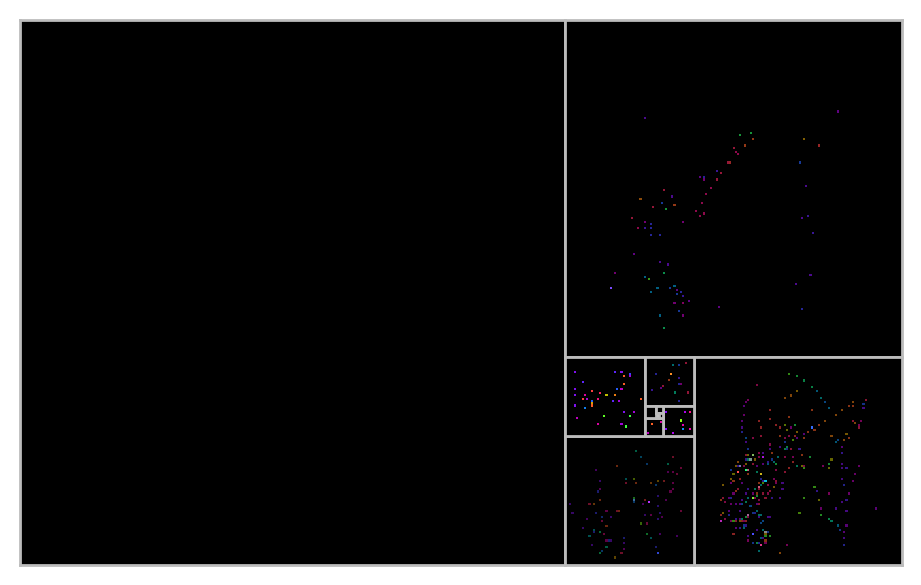

In [34]:
opts= {'vmin':0., 'vmax':1., 'interpolation':'nearest', 'origin':'upper'}

#pe = ParameterSet('default_param.py')
#im = Image(pe)
#lg = LogGabor(im)
#mp = SparseEdges(lg)

phi = (np.sqrt(5) +1.)/2. # golden number
fig = plt.figure(figsize=(fig_width, fig_width/phi))
xmin, ymin, size = 0, 0, 1.

edges = np.load(matname)
im_RGB =[]
for i_level in range(mp.n_levels):
    im_RGB_ = np.zeros((np.ceil(im.N_X*phi**-i_level), np.ceil(im.N_Y*phi**-i_level), 3))
    im_RGB.append(im_RGB_)

for edge in edges.T:
    x, y, theta, sf, coeff, phase = edge
    level = np.argmax(mp.sf_0 == sf)
    #print sf, np.argmax(mp.sf_0 == sf), level
    i_x, i_y = int(x*phi**-level), int(y*phi**-level)
    #print i_x, i_y, im_RGB[level].shape
    #im_RGB[level][i_x, i_y, :] += coeff * np.array([.5*np.sin(2*theta + 2*i*np.pi/3)+.5 for i in range(3)])
    im_RGB[level][i_x, i_y, :] += np.array([.5*np.sin(2*theta + 2*i*np.pi/3)+.5 for i in range(3)])
    
for i_level in range(mp.n_levels):
    a = fig.add_axes((xmin/phi, ymin, size/phi, size), axisbg='w')
    a.axis(c='b', lw=0)
    plt.setp(a, xticks=[])
    plt.setp(a, yticks=[])

    im_RGB[i_level] /= im_RGB[i_level].max()
    a.imshow(im_RGB[i_level], **opts)
    a.grid(False)
    i_orientation = np.mod(i_level, 4)
    if i_orientation==0:
        xmin += size
        ymin += size/phi**2
    elif i_orientation==1:
        xmin += size/phi**2
        ymin += -size/phi
    elif i_orientation==2:
        xmin += -size/phi
    elif i_orientation==3:
        ymin += size
    size /= phi 
    #print i_orientation, xmin, ymin, size
if not(srcpath==''): 
    for ext in FORMATS: fig.savefig(srcpath + '/figures/SparseLets_A_pyr.' + ext)

1.40317445163e-15 0.0913432895446 19.585841691 18.5370933556


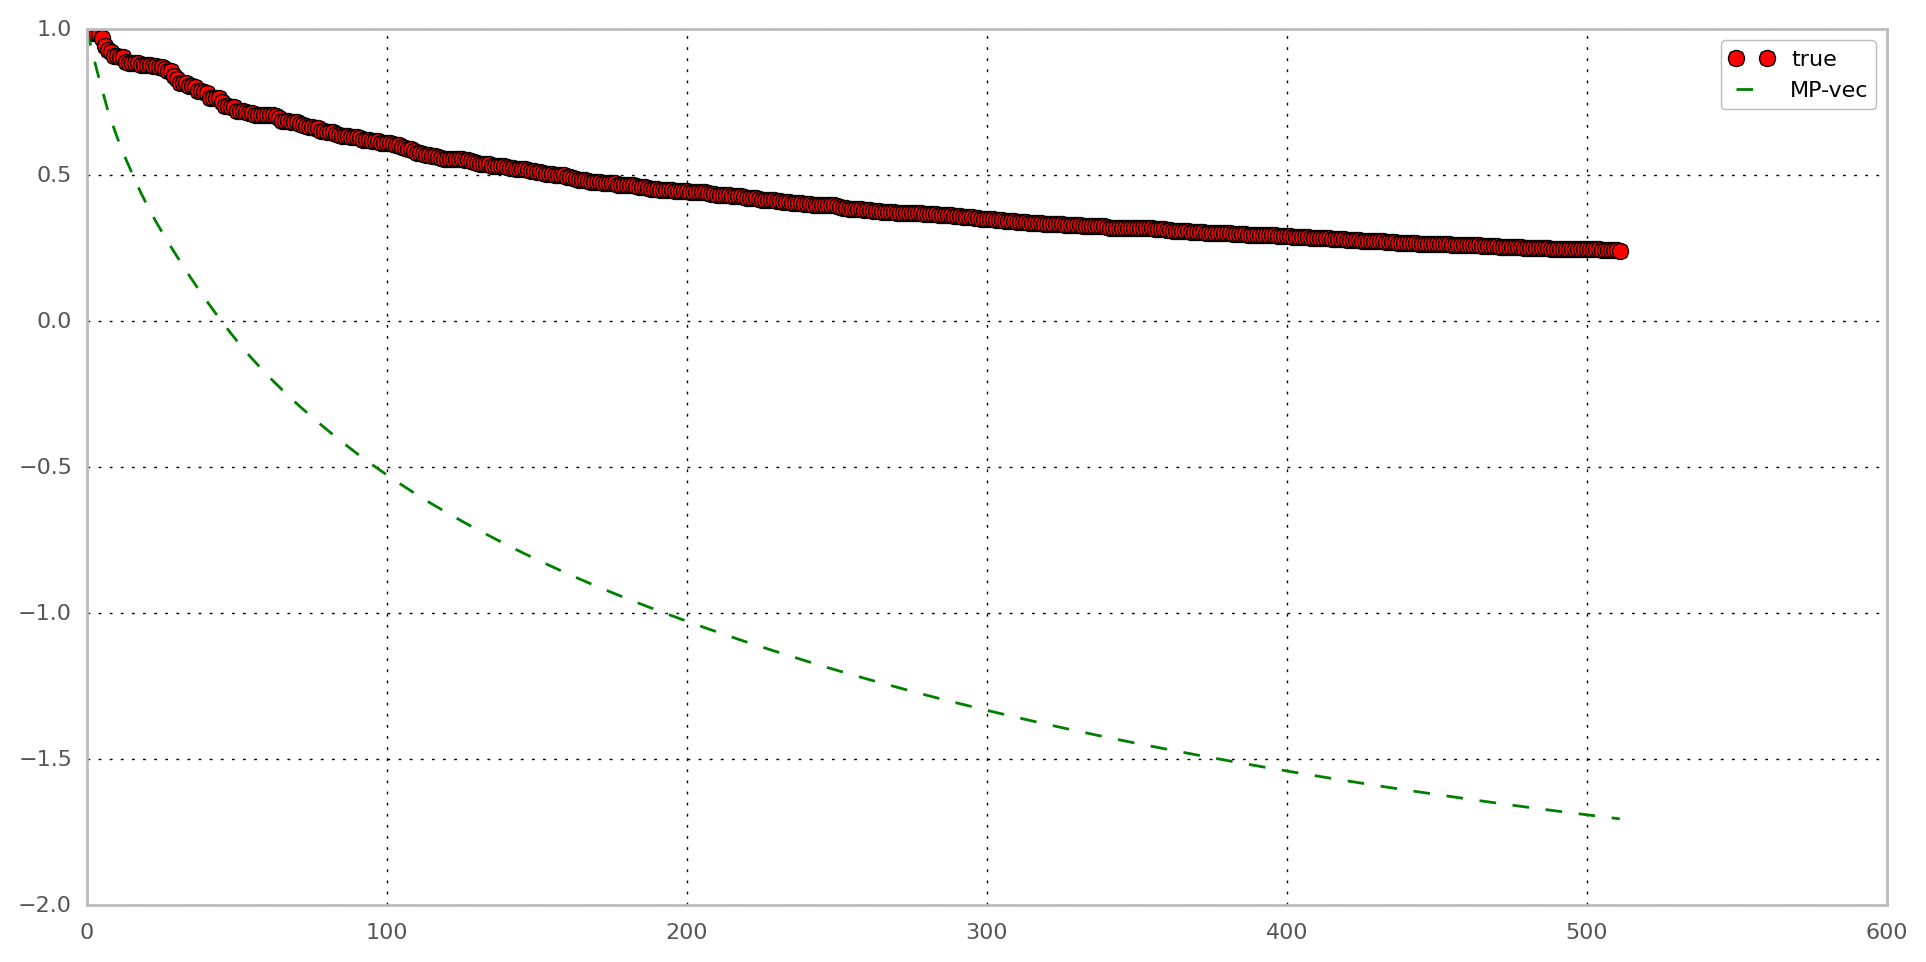

In [35]:
# checking the quick computation of the RMSE in MP
# include MASK ...
image_W = im.whitening(image)
RMSE_0 = (image_W**2).sum() * mp.MP_mask.mean()
print(image_W.mean(), image_W.std(), np.sqrt(RMSE_0), np.sqrt(RMSE[0]))
    

RMSE_MP = np.ones(im.pe.N)
RMSE_MP[1:] = 1. - np.cumsum(edges[4, :-1]**2) * (2 -  mp.pe.MP_alpha)/mp.pe.MP_alpha / RMSE_0

plt.figure(figsize=(12,6))
plt.subplot(111)
plt.plot(RMSE/RMSE[0], 'ro', label='true')
plt.plot(RMSE_MP, 'g--', label='MP-vec')
plt.legend()

In [36]:
#    RMSE = np.ones(pe.N)
#    for i_N in range(1, pe.N):
#        image_ = mp.reconstruct(edges[:, :i_N])
#        RMSE[i_N] =  ((image_W-image_)**2).sum() / RMSE_0
edges = np.load('mat/example.npy')
print(RMSE.shape, mp.N)

(512,) 512


[Back to top](#SparseEdges)

### Showing progressive reconstruction

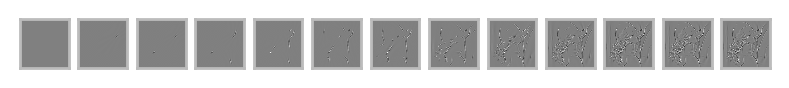

In [37]:
import os 
im = Image('default_param.py')
lg = LogGabor(im)
mp = SparseEdges(lg)

list_of_number_of_edge = [ 0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # np.logspace(1, 10, 10, base=2) #

# defining input image as Lena
from pylab import imread
image = imread('database/yelmo' + str(im.N_X) + '.png').mean(axis=-1)#.flipud().fliplr()
image = imread('database/lena' + str(im.N_X) + '.png').mean(axis=-1)#.flipud().fliplr()

vmax = image.max()

matname = 'mat/example.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)      

fig_movie, axs = plt.subplots(1, len(list_of_number_of_edge), figsize=(5, 5*len(list_of_number_of_edge)))

for i_ax, number_of_edge in enumerate(list_of_number_of_edge):
    image_ = mp.reconstruct(edges[:, :number_of_edge][..., np.newaxis])
#            image_ = im.dewhitening(image_)

#    fig_movie, axs[i_ax] = mp.show_edges(edges[:, :number_of_edge], image=image_/vmax, fig=fig_movie, a=axs[i_ax], norm=False)
    fig_movie, axs[i_ax] = mp.show_edges(np.zeros((6,1)), image=image_/vmax, fig=fig_movie, a=axs[i_ax], norm=False)
    
    figname = os.path.join(srcpath, 'figures/MP_' + str(number_of_edge) + '.png')
    if not(os.path.isfile(figname)):
        try:
            fig, a = mp.show_edges(edges[:, :number_of_edge], image=(image-image_)/vmax, norm=False)
            fig.savefig(figname)
            plt.close('all')
        except Exception as e:
            print('Failed to make image ', figname, ', error : ', e)

    figname = os.path.join(srcpath, 'figures/MP_' + str(number_of_edge) + '_reconstruct.png')
    if not(os.path.isfile(figname)):
        try:
            fig, a = mp.show_edges(edges[:, :number_of_edge], image=image_/vmax, norm=False)
            fig.savefig(figname)
            plt.close('all')
        except Exception as e:
            print('Failed to make reconstruct image ', figname, ', error : ', e)

fig.show()

### Effect of parameters on edge extraction: image size

In [38]:
%%writefile test/experiment_fig-sparselets.py
"""

$ python test/experiment_fig-sparselets.py ../../CNRS/BICV-book/BICV_sparse/src/

$ rm -fr **/SparseLets* **/**/SparseLets* 

"""

from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges, plot
import sys

pe = ParameterSet('default_param.py')

def init_pe(pe, N_X=im.N_X, N_image=im.pe.N_image, N=im.pe.N, path=''):
    pe.N_image = N_image
    pe.N_X = N_X
    pe.N_Y = N_X
    pe.N = N
    pe.seed = 42
    pe.figpath = path + 'figures/'
    pe.edgefigpath = path + 'figures/edges/'
    pe.matpath = path + 'mat/'
    pe.edgematpath = path + 'mat/edges/'
    im = Image(pe)
    lg = LogGabor(im)
    mp = SparseEdges(lg)
    return mp

dofig = True
try:
    path = sys.argv[1]
except:
    path = ''
    dofig = False
    
mps = []
for size, size_str in zip([16, 32, 64, 128, 256], ['_016', '_032', '_064',  '_128', '']):
    mp = init_pe(pe, N_X=size, N_image=pe.N_image*im.N_X/size, N=pe.N*size**2/im.N_X**2, path=path)
    mp.process('SparseLets' + size_str)
    mps.append(mp)

import matplotlib.pyplot as plt
fig_width_pt = 318.670 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig = plt.figure(figsize=(fig_width, fig_width/1.618))

sizes = [16, 32, 64, 128, 256]
experiments = ['SparseLets_' + '%0.3d' % size for size in sizes] # ['testing_vanilla_016', 'testing_vanilla_032', 'testing_vanilla_064', 'testing_vanilla_128', 'testing_vanilla']
experiments[-1] = 'SparseLets'
databases = ['serre07_distractors'] * len(experiments)
labels = [str(size) for size in sizes]
fig, a, ax = plot(fig=fig, mps=mps, experiments=experiments, databases=databases, 
                  labels=labels, scale=True)    
if dofig: 
    FORMATS = ['pdf', 'eps']
    for ext in FORMATS: fig.savefig(mps[0].pe.figpath + 'SparseLets_B.' + ext)


Overwriting test/experiment_fig-sparselets.py


In [39]:
import os
cmd = 'python test/experiment_fig-sparselets.py ' + srcpath
os.system(cmd)
#%run test/experiment_fig-sparselets.py

256

### Effect of parameters on edge extraction: filter parameters

In [40]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'text.usetex': False})
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg' #raw_input('what figure format should we use? ') or default
#%config InlineBackend.rc = {'font.size': 14, 'text.usetex': False, 'savefig.dpi': 96, 'figure.figsize':  (13.0, 8.0), 'figure.subplot.bottom': 0.125}
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
# http://ipython.org/ipython-doc/stable/config/extensions/autoreload.html
#%load_ext autoreload
#%autoreload 2

# where should we store the figures generated by this notebook
#figpath = '../../CNRS/BICV-book/BICV_INT/BICV-sparse/'
#figpath = './figures/'


In [41]:
!pip install lmfit

In [42]:
%%writefile test/experiment_fig-efficiency.py
"""

$ python experiment_fig-efficiency.py ../../CNRS/BICV-book/BICV-sparse/src/

rm -fr **/efficiency_* **/**/efficiency_* 

"""

import __init__
import numpy as np
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges, plot
import sys
pe = ParameterSet('default_param.py')

threshold = None # classical plots
threshold = .15 # plot sparseness obtained when reaching this threshold

dofig = True
try:
    path = sys.argv[1]
except:
    path = ''
    dofig = False
    
def init_pe(pe, N_X=im.N_X, N_image=pe.N_image, N=pe.N):
    pe.seed = 123456
    pe.N_image = N_image
    pe.N_X = N_X
    pe.N = N
    pe.figpath = path + 'figures/'
    pe.edgefigpath = path + 'figures/edges/'
    pe.matpath = path + 'mat/'
    pe.edgematpath = path + 'mat/edges/'
    im = Image(pe)
    lg = LogGabor(im)
    mp = SparseEdges(lg)
    return mp

    
FORMATS = ['pdf', 'eps']
#FORMATS = ['png']
import matplotlib
matplotlib.use('Agg') 
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'text.usetex': False})

import matplotlib.pyplot as plt
fig_width_pt = 318.67085 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

fig, [[A, B], [C, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width), subplot_kw={'axisbg':'w'})


mps, experiments = [], []
v_B_sf = np.logspace(-.2, .2, 5, base=10, endpoint=True)*pe.B_sf
for B_sf in v_B_sf:
    pe = ParameterSet('default_param.py')
    pe.B_sf = B_sf
    mp = init_pe(pe)
    exp = 'efficiency_B_sf_' + str(B_sf).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_sf for B_sf in v_B_sf]
try:
    fig, A, ax = plot(mps=mps,
                      experiments=experiments, databases=databases, labels=labels, ref=2,
                      fig=fig, ax=A, color=[0., 1., 0.], threshold=threshold, scale=True)    
    A.set_xlabel(r'frequency bandwith $B_{sf}$')
    #A.set_yticks([0., 0.02, 0.04, 0.06])
except Exception, e:
    print('Failed to plot  with error : %s ' % e )
    
mps, experiments = [], []
v_B_theta = np.logspace(-.5, .5, 5, base=10, endpoint=True)*pe.B_theta
for B_theta in v_B_theta:
    pe = ParameterSet('default_param.py')
    pe.B_theta = B_theta
    mp = init_pe(pe)
    exp = 'efficiency_B_theta_' + str(B_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_theta for B_theta in v_B_theta]
try:
    fig, B, ax = plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=B, threshold=threshold, scale=True, color=[0., 1., 0.])    
    B.set_xlabel(r'orientation bandwith $B_{\theta}$ (radians)')
    B.set_ylabel('')
    #B.set_yticks([0., 0.02, 0.04, 0.06])
    #B.set_yticklabels(['', '', '', ''])
except Exception, e:
    print('Failed to plot  with error : %s ' % e )
    
mps, experiments = [], []
v_n_theta = [6, 12, 24, 48]
for n_theta in v_n_theta:
    pe = ParameterSet('default_param.py')
    pe.n_theta = n_theta
    mp = init_pe(pe)
    exp = 'efficiency_n_theta_' + str(n_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = [str(n_theta) for n_theta in v_n_theta]
try:
    fig, C, ax = plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=C, threshold=threshold, scale=True, color=[0., 1., 0.])    
    C.set_xlabel(r'number of orientations $N_{\theta}$')
    #C.set_yticks([0., 0.02, 0.04, 0.06])
except Exception, e:
    print('Failed to plot  with error : %s ' % e )
    
mps, experiments = [], []
v_base_levels = [np.sqrt(2), np.sqrt(5)/2.+.5, np.sqrt(3), 2. , np.sqrt(5)]
#np.logspace(.25, 1.25, 5, base=2, endpoint=True)
for base_levels in v_base_levels:
    pe = ParameterSet('default_param.py')
    pe.base_levels = base_levels
    mp = init_pe(pe)
    exp = 'efficiency_base_levels_' + str(base_levels).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % (base_levels) for base_levels in v_base_levels]
labels[0] = r'$\sqrt{2}$'
labels[1] = r'$\phi$'
labels[3] = '2'
try:
    fig, D, ax = plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=3, 
                      fig=fig, ax=D, threshold=threshold, scale=True, color=[0., 1., 0.])    
    D.set_xlabel(r'scale ratio')
    D.set_ylabel('')
    D.set_yticks([0., 1., 1.3])
    D.set_yticklabels(['0', '1', ''])
except Exception, e:
    print('Failed to plot  with error : %s ' % e )

for ax, label in zip([A, B, C, D], ['A', 'B', 'C', 'D']):
    ax.text(-.1, .95, label, transform=ax.transAxes, fontsize=12) #'('+label+')'
    ax.set_ylim([0., 1.6])
    ax.set_yticks([0., 1., 1.4])
    ax.set_yticklabels(["0", '1', ''])
    if label in ['B', 'D']: ax.set_yticklabels(['', '', ''])


#The parameter meanings (and suggested defaults) are::
#
#  left  = 0.125  # the left side of the subplots of the figure
#  right = 0.9    # the right side of the subplots of the figure
#  bottom = 0.1   # the bottom of the subplots of the figure
#  top = 0.9      # the top of the subplots of the figure
#  wspace = 0.2   # the amount of width reserved for blank space between subplots
#  hspace = 0.2   # the amount of height reserved for white space between subplots
fig.subplots_adjust(wspace=0.12, hspace=0.3,
                            left=0.125, right=0.98,
                            top=0.98,    bottom=0.12)
    
if dofig:
    for ext in FORMATS: fig.savefig(mp.pe.figpath + 'efficiency.' + ext)
fig.show()

Overwriting test/experiment_fig-efficiency.py


In [43]:
import os
cmd = 'python test/experiment_fig-efficiency.py ' + srcpath
_ = os.system(cmd)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

## some book keeping for the notebook

In [44]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

Installed watermark.py. To use it, type:
  %load_ext watermark
21/05/2015 00:36:00

CPython 3.4.3
IPython 3.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)
system     : Darwin
release    : 14.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [45]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.4.3 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)]
IPython 3.1.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
sympy 0.7.6
Thu May 21 00:36:03 2015 CEST

In [46]:
# CSS styling within IPython notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()